In [1]:
# used to reload utils everytime a new function is added
import imp
from utils import utils
imp.reload(utils)  

# Data 
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
from matplotlib import pyplot as plt, __version__

#others
import sys

## Stack of technologies

In [2]:
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)
print("Matplotlib version: ", __version__)
print("Python version: ", sys.version)

Pandas version:  0.23.4
Numpy version:  1.15.4
Matplotlib version:  3.0.2
Python version:  3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [3]:
credit_data = pd.read_csv('../data_in/credit-data.csv')

In [4]:
# Rename column with borrower's ids
credit_data = credit_data.rename(columns={'unnamed: 0': 'borrower_id'})

## Data Exploration

In [5]:
credit_data.sample(10)

,borrower_id,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
101858,101859,0,0.310241,27,3,0.584166,1300.0,8,0,0,0,0.0
20289,20290,0,0.615377,44,0,0.214338,4100.0,7,0,1,0,2.0
124110,124111,0,0.002008,65,0,0.269137,6583.0,10,0,1,0,2.0
129196,129197,0,0.773232,44,0,3698.000000,NaN,8,0,2,0,0.0
108133,108134,1,1.000000,45,0,0.040417,2300.0,1,0,0,1,0.0
34492,34493,1,1.000000,33,0,0.322099,2877.0,4,0,0,0,0.0
76015,76016,0,0.000000,50,0,2180.000000,NaN,12,0,1,0,3.0
149468,149469,0,0.031148,45,0,0.170883,10000.0,5,0,1,0,1.0
106753,106754,0,0.000743,37,0,0.444523,7083.0,9,0,1,0,2.0
11578,11579,0,0.311431,78,1,0.187925,2500.0,13,0,0,0,0.0


### Check types of dataframe column values

In [6]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
borrower_id                                    150000 non-null int64
serious_dlqin2yrs                              150000 non-null int64
revolving_utilization_of_unsecured_lines       150000 non-null float64
age                                            150000 non-null int64
number_of_time30-59_days_past_due_not_worse    150000 non-null int64
debt_ratio                                     150000 non-null float64
monthly_income                                 120269 non-null float64
number_of_open_credit_lines_and_loans          150000 non-null int64
number_of_times90_days_late                    150000 non-null int64
number_real_estate_loans_or_lines              150000 non-null int64
number_of_time60-89_days_past_due_not_worse    150000 non-null int64
number_of_dependents                           150000 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


* Column **number_of_dependents** should be of type int64

In [7]:
credit_data['number_of_dependents'] = credit_data['number_of_dependents'].astype('int64')
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
borrower_id                                    150000 non-null int64
serious_dlqin2yrs                              150000 non-null int64
revolving_utilization_of_unsecured_lines       150000 non-null float64
age                                            150000 non-null int64
number_of_time30-59_days_past_due_not_worse    150000 non-null int64
debt_ratio                                     150000 non-null float64
monthly_income                                 120269 non-null float64
number_of_open_credit_lines_and_loans          150000 non-null int64
number_of_times90_days_late                    150000 non-null int64
number_real_estate_loans_or_lines              150000 non-null int64
number_of_time60-89_days_past_due_not_worse    150000 non-null int64
number_of_dependents                           150000 non-null int64
dtypes: float64(3), int64(9)
memory usage: 13.7 MB


### Check for duplicated entries

In [8]:
#Check size of the dataframe before drop duplicated rows
print(credit_data.shape)

(150000, 12)


In [9]:
#Drop duplicated rows
credit_data.drop_duplicates(keep='first', inplace=True)

In [10]:
#Check size of the dataframe after drop duplicated rows
print(credit_data.shape)

(150000, 12)


There are no duplicated entries in the dataset 

## Data general  overview

In [11]:
round(credit_data.describe(percentiles=[.01, .05, .10, .25, .50, .75, .90, .95, .99]), 2)

,borrower_id,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,150000.00
mean,75000.50,0.07,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.74
std,43301.41,0.25,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.11
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1%,1500.99,0.00,0.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5%,7500.95,0.00,0.00,29.00,0.00,0.00,1300.00,2.00,0.00,0.00,0.00,0.00
10%,15000.90,0.00,0.00,33.00,0.00,0.03,2005.00,3.00,0.00,0.00,0.00,0.00
25%,37500.75,0.00,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,75000.50,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,112500.25,0.00,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00


At a first glance over the data some first observations can be made:
- Most of the columns have outlier values. 
- Column **serious_dlqin2yrs** seems to contain cathegorical data
- Column **monthly_income** has missing values. 

Further analysis will be made in order to choose the best way to treat missing values.

In [12]:
#Check if serious_dlqin2yrs contains cathegorical data
credit_data.serious_dlqin2yrs.unique()

array([1, 0])

**serious_dlqin2yrs** will be treated as cathegorical

['revolving_utilization_of_unsecured_lines' 'age'
 'number_of_time30-59_days_past_due_not_worse' 'debt_ratio'
 'monthly_income' 'number_of_open_credit_lines_and_loans'
 'number_of_times90_days_late' 'number_real_estate_loans_or_lines'
 'number_of_time60-89_days_past_due_not_worse' 'number_of_dependents']


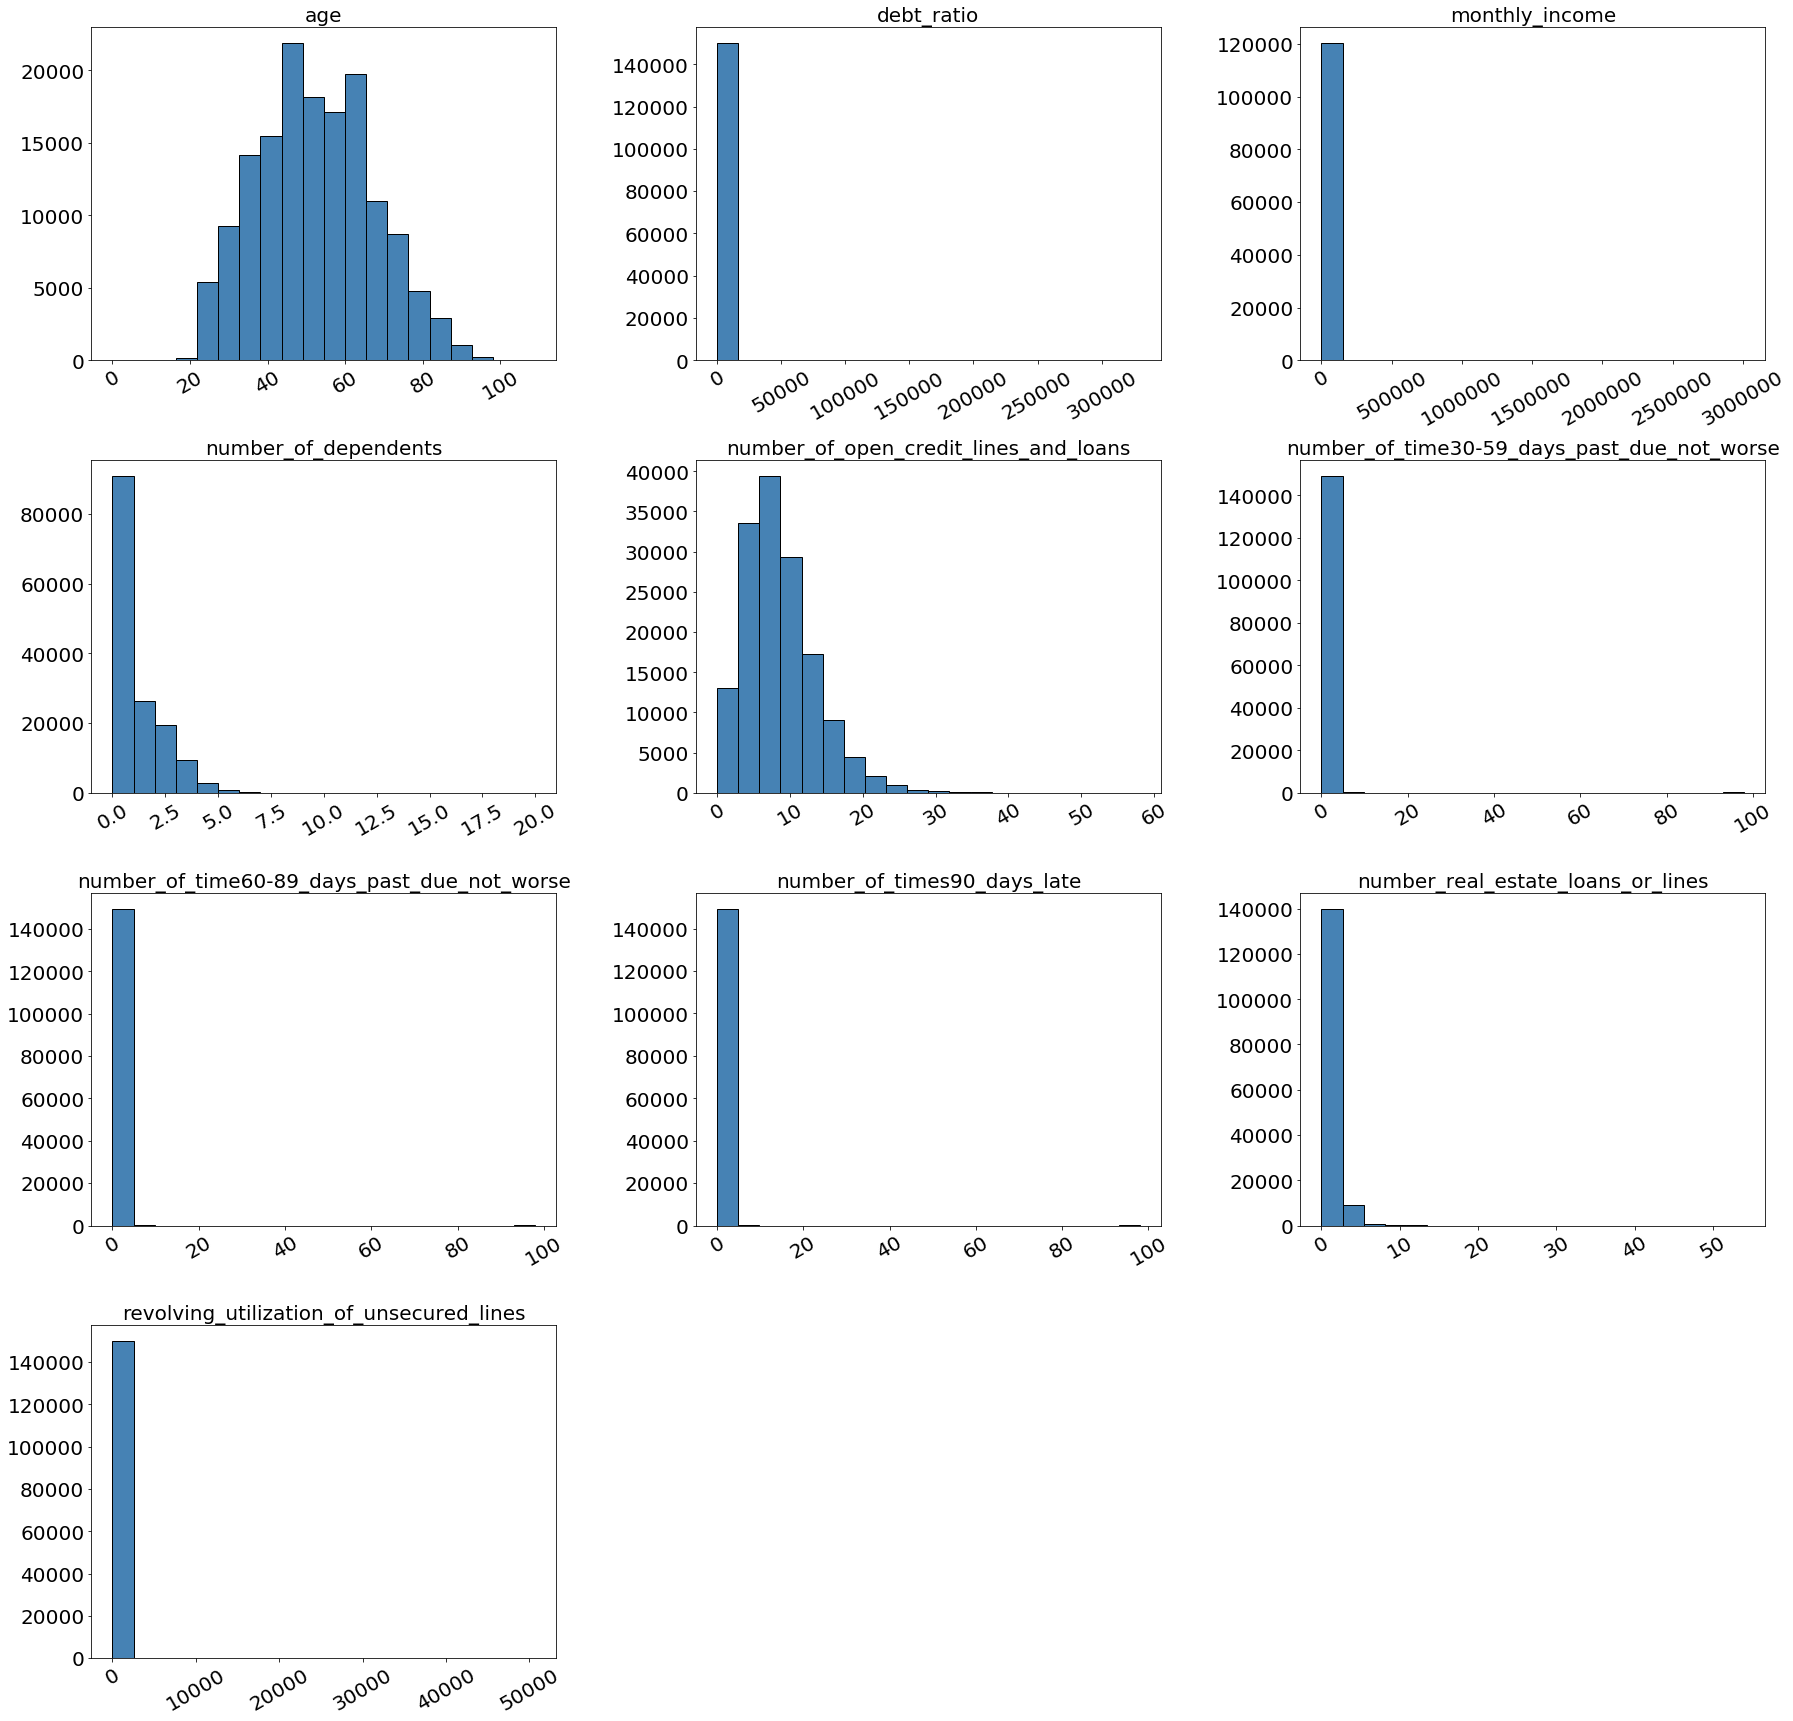

In [13]:
#Remove borrower_id and serious_dlqin2yrs columns from plotting list
columns_to_plot= credit_data.columns.values[2:]
print(columns_to_plot)

ax = credit_data[columns_to_plot].hist(bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, figsize=(30,30),
           xlabelsize=20, ylabelsize=20, grid=False);

[x.title.set_size(20) for x in ax.ravel()];
[x.tick_params('x', labelrotation=30.0) for x in ax.ravel()];
plt.show()

## Outliers analysis

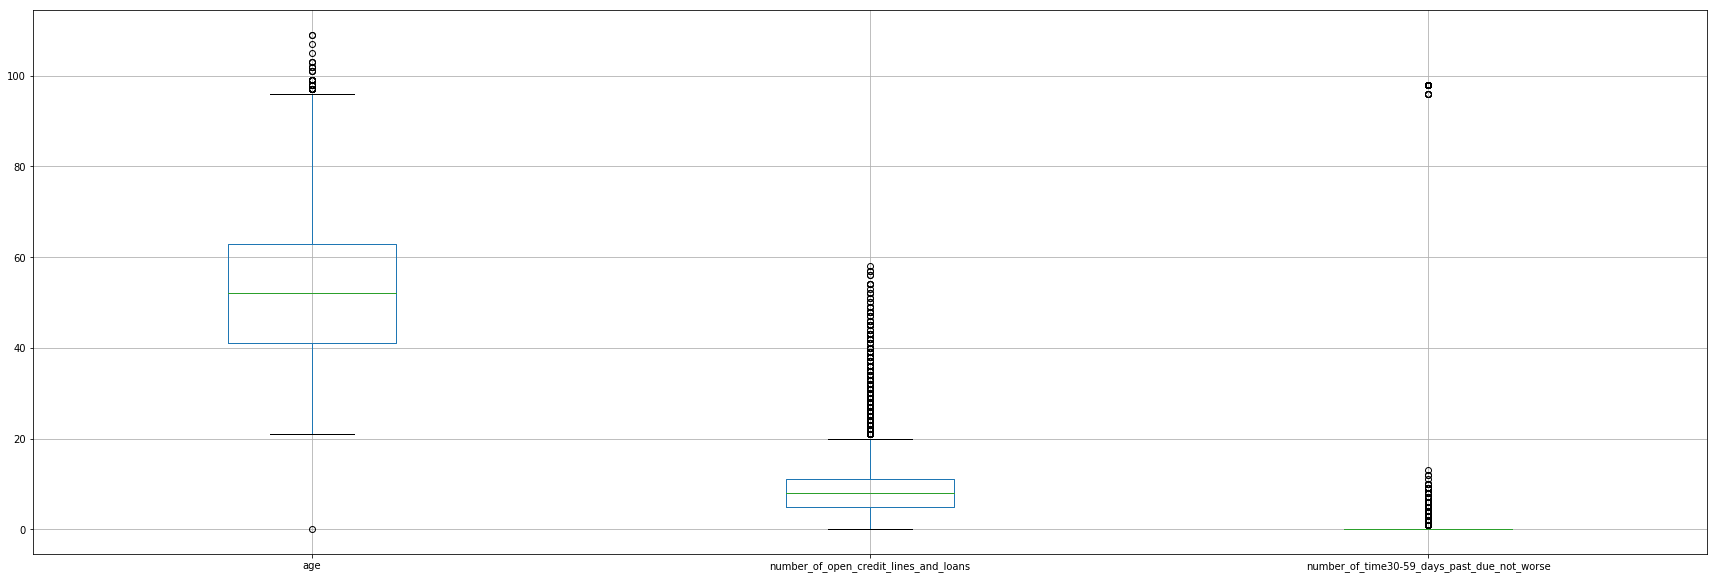

In [14]:
columns_to_plot = ['age', 'number_of_open_credit_lines_and_loans', 'number_of_time30-59_days_past_due_not_worse']
ax = credit_data[columns_to_plot].boxplot(vert=True, figsize=(30,10));

Some obvious outliers can be observed in the Age column in the number_of_open_credit_lines_and_loans column deeper analysis is needed

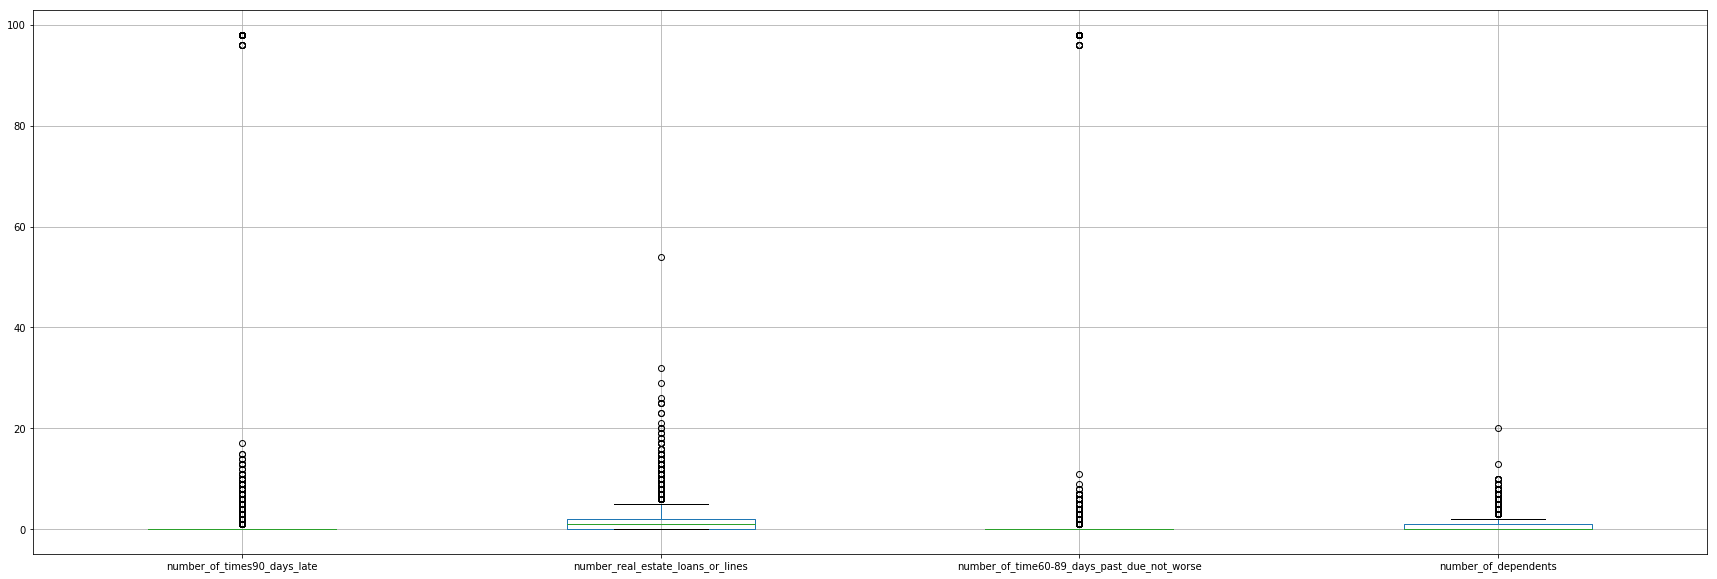

In [15]:
columns_to_plot = ['number_of_times90_days_late', 'number_real_estate_loans_or_lines',
                   'number_of_time60-89_days_past_due_not_worse', 'number_of_dependents']
ax = credit_data[columns_to_plot].boxplot(vert=True, figsize=(30,10));

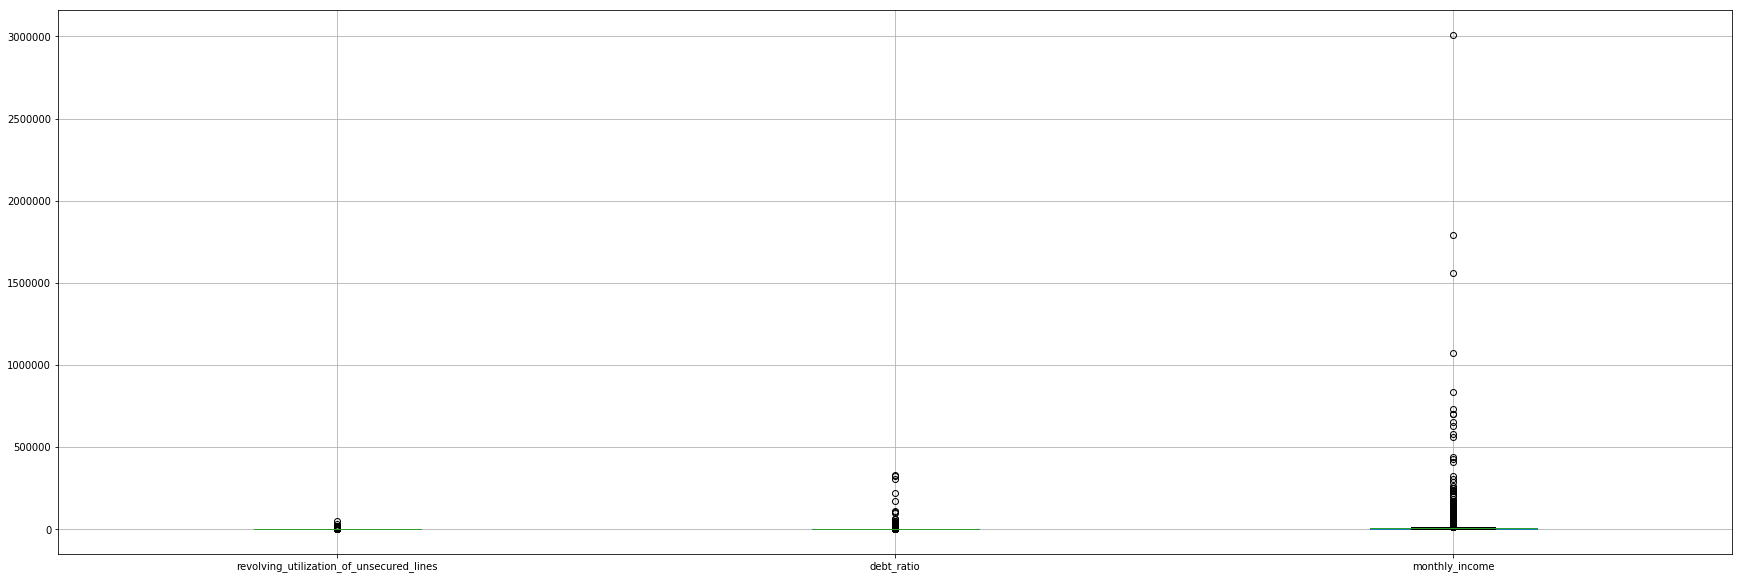

In [16]:
columns_to_plot = ['revolving_utilization_of_unsecured_lines', 'debt_ratio', 'monthly_income']
ax = credit_data[columns_to_plot].boxplot(vert=True, figsize=(30,10));

# Outlier evaluation

Paricular evaluation will be carry on for each column (or group of columns) in order to deal with outliers. It wil be used two methods to indentify outliers. 

 - method 1:
     * upper_limit: q3 + 1.5 * IQR (interquartile range)
     * lower_limit: q1 - 1.5 * IQR
 
 
 - method 2:
     Use quantiles
     * data points that lies above quantile 95 or 99
     * data points that lies belowe quantile 01 or 05

## Column Age

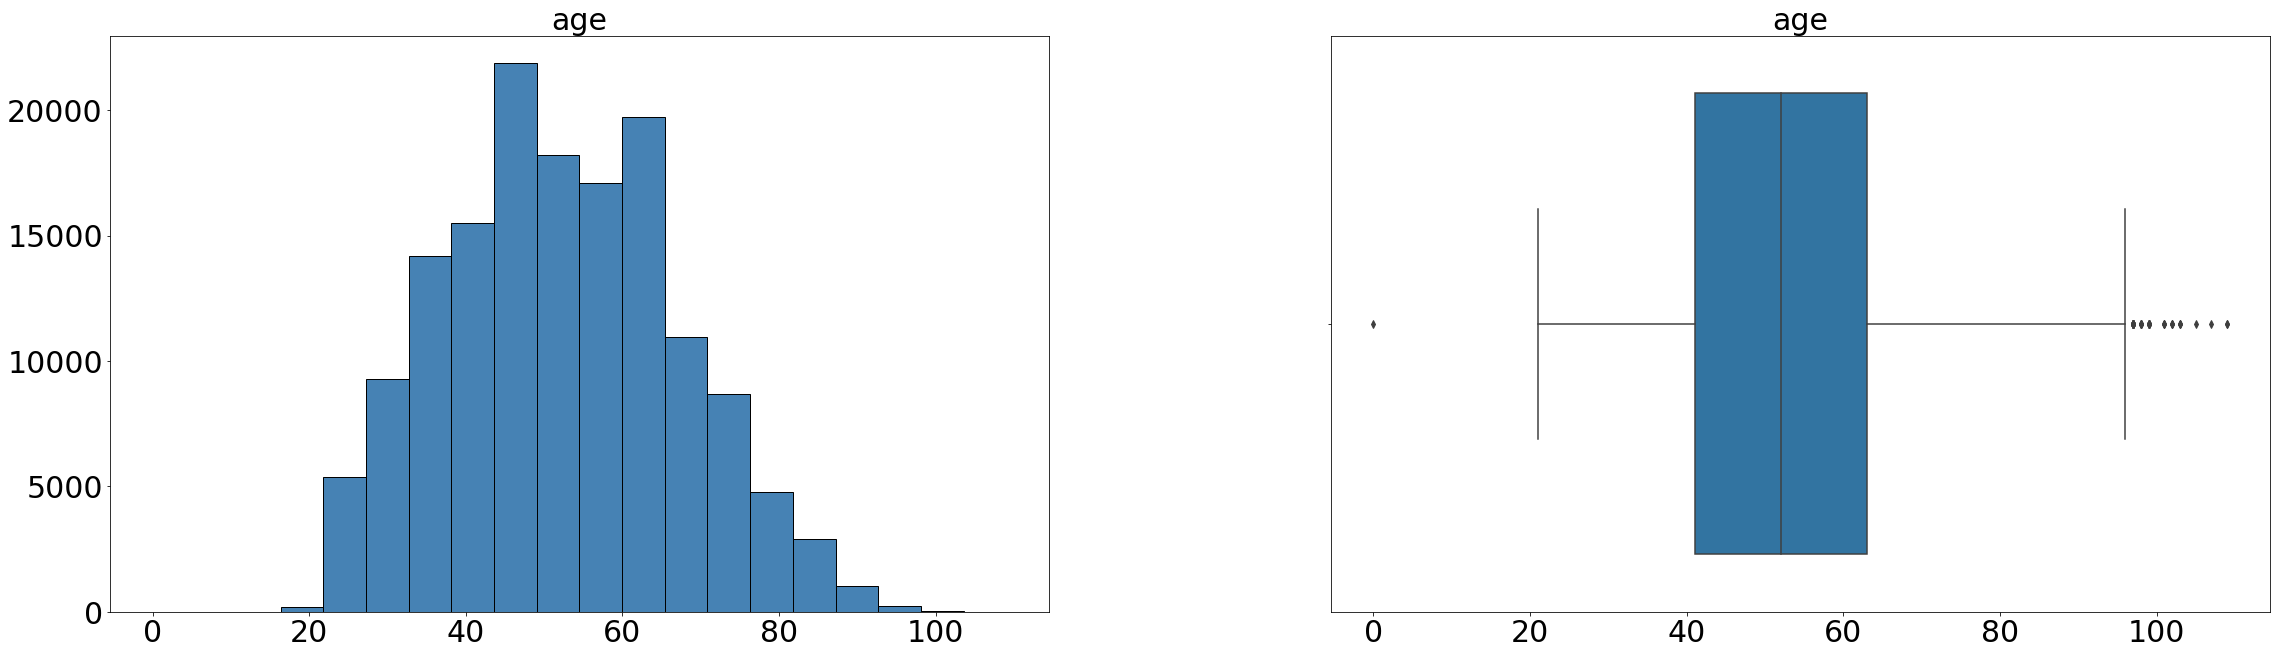

In [17]:
column_to_plot = 'age'


#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

#Plot boxplot
sns.boxplot( credit_data[[column_to_plot]], ax=axes_2)
    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)


#Show
plt.show()

In [18]:
lower_bound, upper_bound, q01, q05, q95, q99 = utils.get_outlier_bounds(credit_data['age'])
print('lower_bound: {0}'.format(lower_bound))
print('upper_bound: {0}'.format(upper_bound))
print('quantile 1: {0}'.format(q01))
print('quantile 5: {0}'.format(q05))
print('quantile 95: {0}'.format(q95))
print('quantile 99: {0}'.format(q99))

lower_bound: 8.0
upper_bound: 96.0
quantile 1: 24.0
quantile 5: 29.0
quantile 95: 78.0
quantile 99: 87.0


### Lower bound

In [19]:
# outliers bellow lower bound using method 1
credit_data.loc[(credit_data.age < lower_bound)]

,borrower_id,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2


a borrower with an age of 0 if clearly an outlier never the less, a low limit of 8 years old does not seem to be fine neighter. Quantiles 1 or 5 will be analyzed to see if any of them it is a better choise as lower limit.

In [20]:
# outliers bellow lower bound using method 2
round(100 * (credit_data.loc[(credit_data.age < q01)].shape[0] / credit_data.shape[0]), 2)

0.84

In [21]:
# outliers bellow lower bound using method 3
round(100 * (credit_data.loc[(credit_data.age < q05)].shape[0] / credit_data.shape[0]), 2)

4.75

Both quantiles discriminate lot of data:
* q01 discrimate 0.84% of the borrowers
* q05 discriminate 4.75% of the bororowers

q05 takes as outliers a lot of borrowers that are in an age in which most people has finantial activities, so it will be discarded as lower bound. The amount of borrowers betweetn 18 years old and q01 will be analyze in order to set the lower bound. The amount of borrowers bellow 18 will be analyze too.

In [22]:
credit_data.loc[(credit_data.age>=18) & (credit_data.age < q01)].shape[0]

1258

In [23]:
credit_data.loc[(credit_data.age<18)].shape[0]

1

Given that the only outlier under 18 it is the same that is detected using the IQR method. **Method 1** will be the chosen one to deal with outliers in the age column

### Upper bound

In [24]:
credit_data.loc[(credit_data.age > upper_bound)].age.value_counts(dropna=False)

97     17
99      9
98      6
103     3
102     3
101     3
109     2
107     1
105     1
Name: age, dtype: int64

In [25]:
credit_data.loc[(credit_data.age > q99)].age.value_counts(dropna=False)

88     313
89     276
90     198
91     154
92      93
93      87
94      47
95      45
96      18
97      17
99       9
98       6
101      3
102      3
103      3
109      2
107      1
105      1
Name: age, dtype: int64

In [26]:
credit_data.loc[(credit_data.age > q95)].age.value_counts(dropna=False)

79     981
80     876
81     774
82     647
83     512
85     483
84     480
86     407
87     357
88     313
89     276
90     198
91     154
92      93
93      87
94      47
95      45
96      18
97      17
99       9
98       6
103      3
101      3
102      3
109      2
105      1
107      1
Name: age, dtype: int64

Given the Outlier's distribution using each method. The most suitable method to choose the upper bound it is method 1.

### Outliers treatment

Age outliers will be mark as NaN since there is not evidence that this data is reliable. Another choise will be to replace values with the upper bound limit value.

In [27]:
credit_data = utils.treat_outliers(data_in=credit_data, column_names=['age'], method='whiskers', value='remove')

/Users/rbechler/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


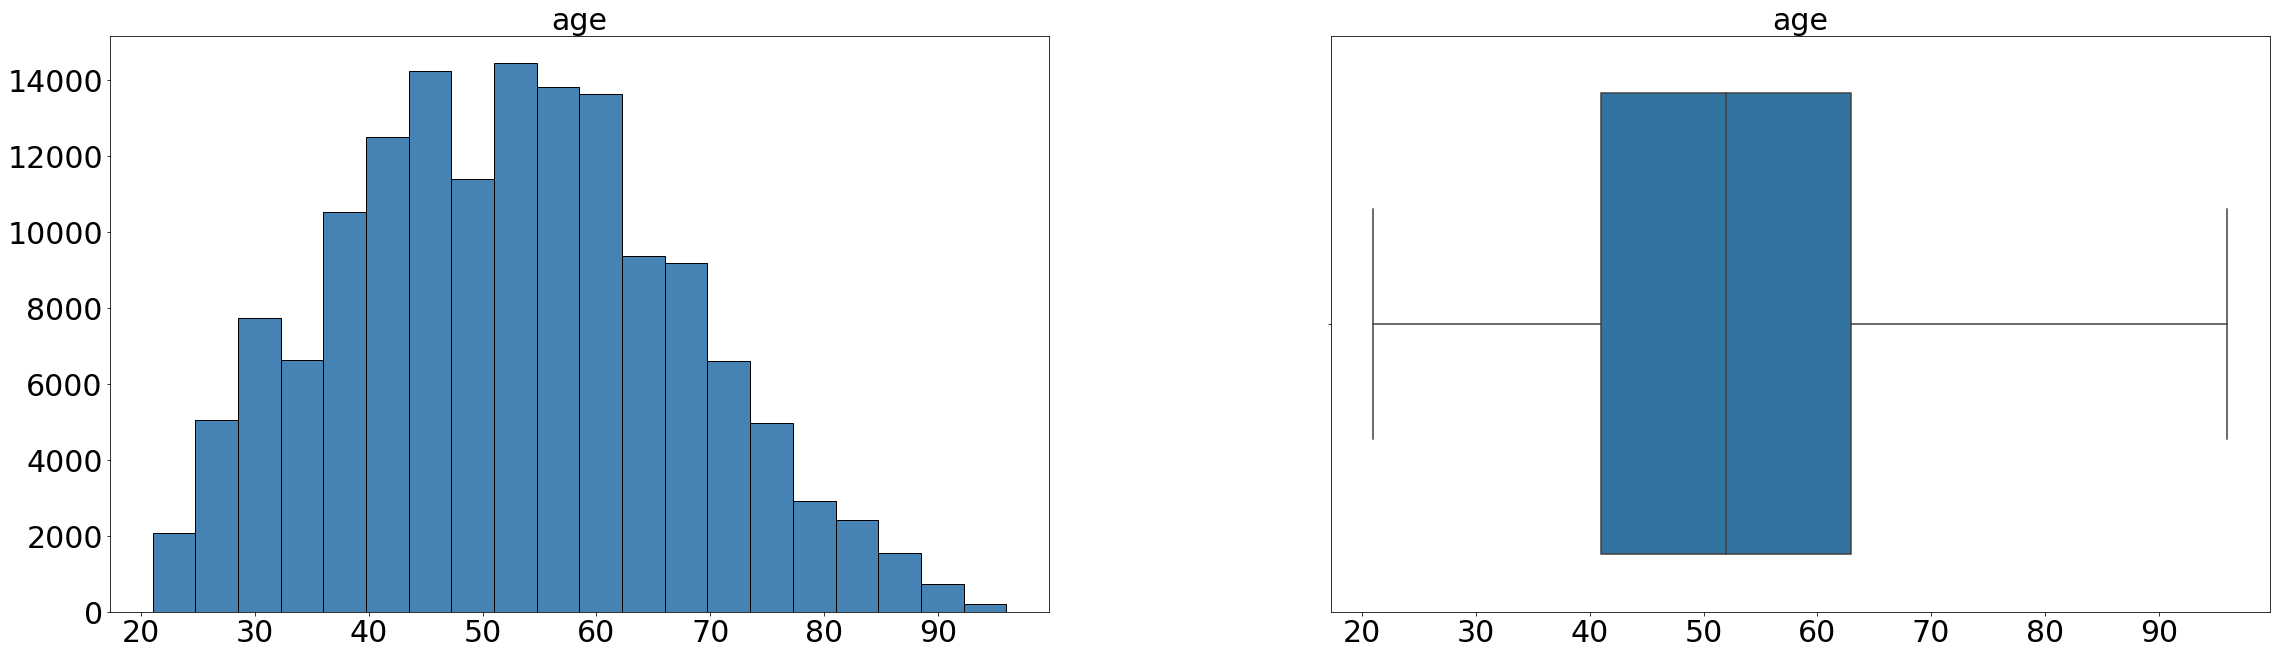

In [28]:
column_to_plot = 'age'

#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

#Plot boxplot
sns.boxplot( credit_data[[column_to_plot]], ax=axes_2)
    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)


#Show
plt.show()

## Column number_of_open_credit_lines_and_loans

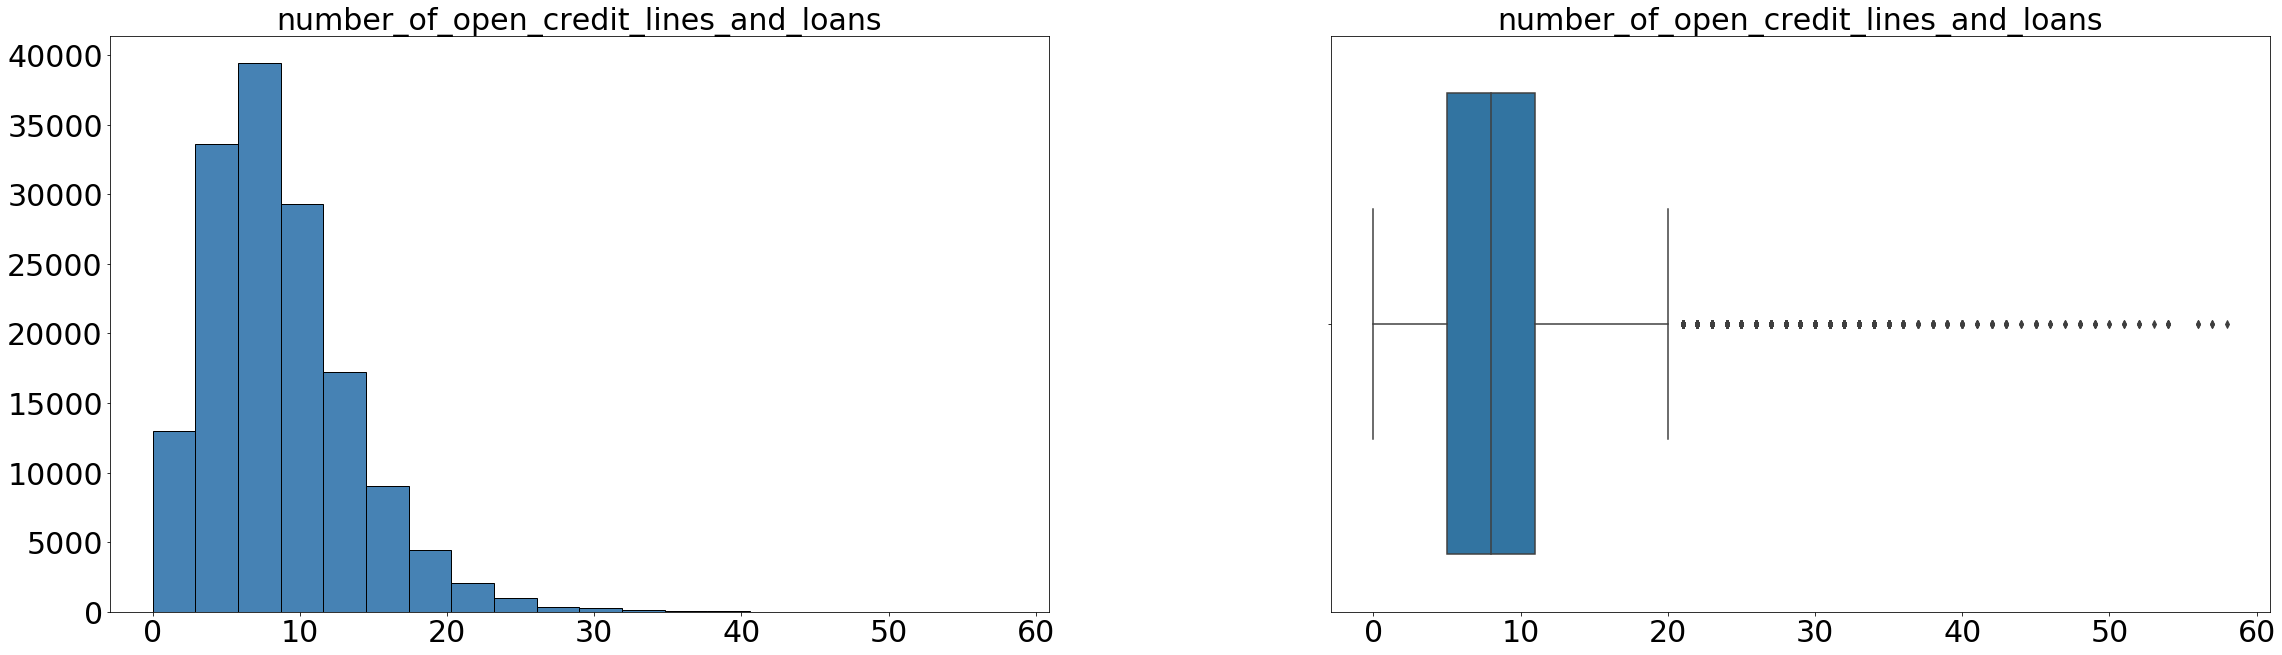

In [29]:
column_to_plot = 'number_of_open_credit_lines_and_loans'


#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

#Plot boxplot
sns.boxplot( credit_data[[column_to_plot]], ax=axes_2)
    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)


#Show
plt.show()

In [30]:
lower_bound, upper_bound, q01, q05, q95, q99 = utils.get_outlier_bounds(credit_data['number_of_open_credit_lines_and_loans'])
print('lower_bound: {0}'.format(lower_bound))
print('upper_bound: {0}'.format(upper_bound))
print('quantile 1: {0}'.format(q01))
print('quantile 5: {0}'.format(q05))
print('quantile 95: {0}'.format(q95))
print('quantile 99: {0}'.format(q99))

lower_bound: -4.0
upper_bound: 20.0
quantile 1: 0.0
quantile 5: 2.0
quantile 95: 18.0
quantile 99: 24.0


Since this column indicates the number of open loans and lines of credits, negative values doesn't make any sense. Because of this reason and because of the histogram of the variable percentile 1 and 99 will be used as lower and upper bounds respectively and values will be replaced with the mean value of the distribution.

In [31]:
credit_data[credit_data.number_of_open_credit_lines_and_loans<0].number_of_open_credit_lines_and_loans.value_counts()

Series([], Name: number_of_open_credit_lines_and_loans, dtype: int64)

In [32]:
credit_data = utils.treat_outliers(data_in=credit_data, column_names=['number_of_open_credit_lines_and_loans'], method='0199', value='mean')

/Users/rbechler/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


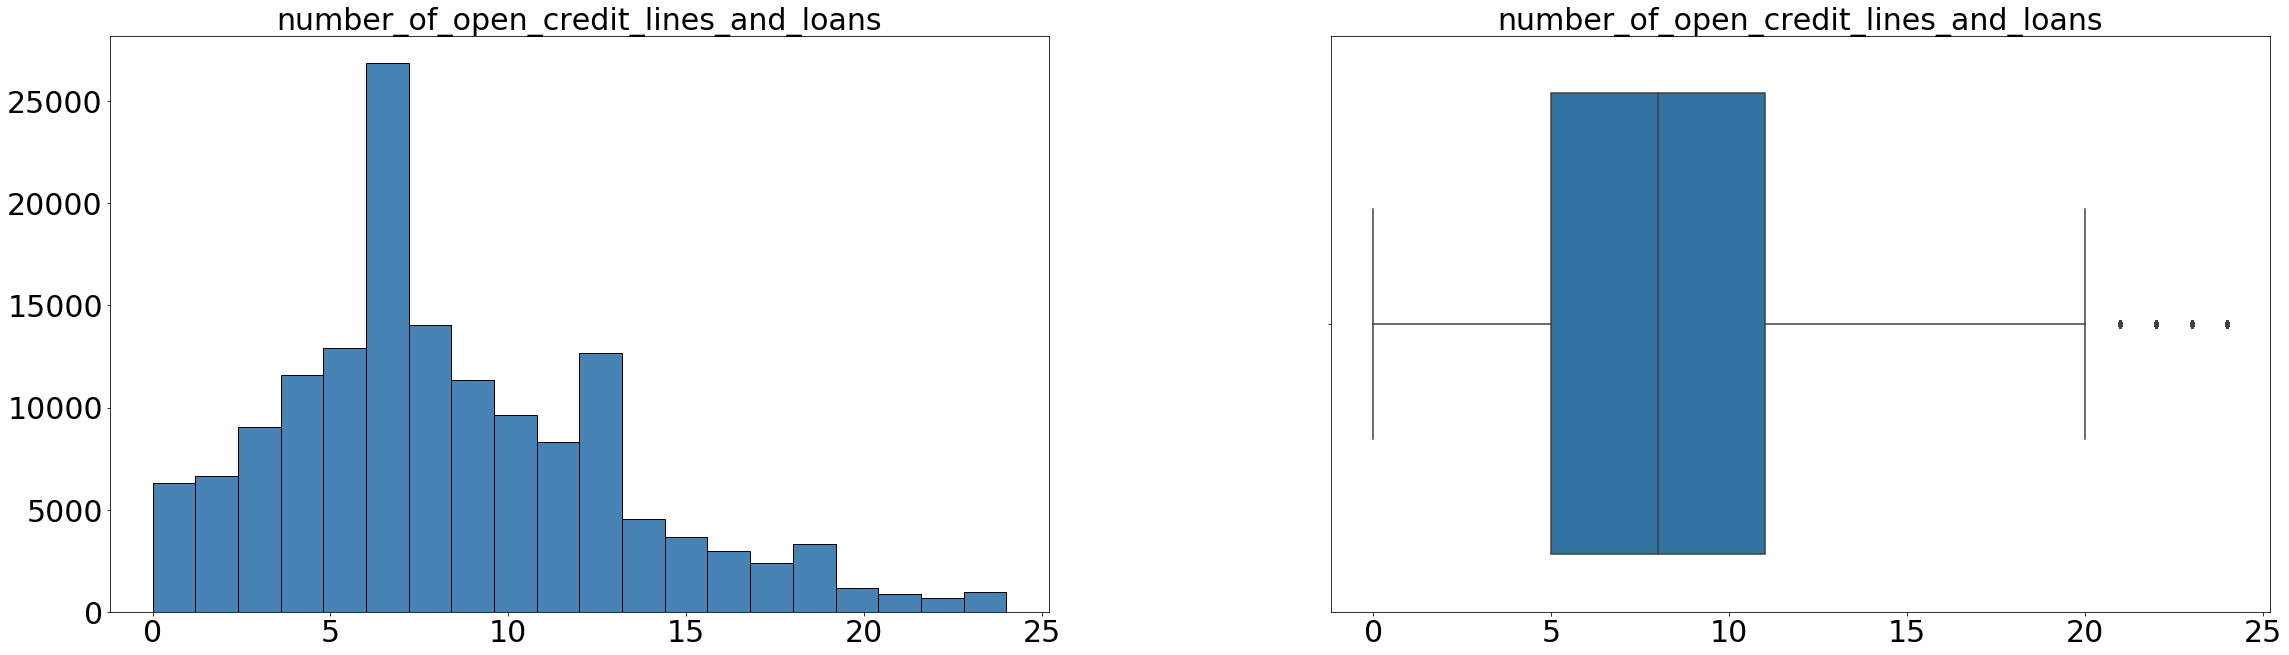

In [33]:
column_to_plot = 'number_of_open_credit_lines_and_loans'


#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

#Plot boxplot
sns.boxplot( credit_data[[column_to_plot]], ax=axes_2)
    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)


#Show
plt.show()

## Column number_of_time30-59_days_past_due_not_worse

In [34]:
column_to_plot = 'number_of_time30-59_days_past_due_not_worse'

In [35]:
lower_bound, upper_bound, q01, q05, q95, q99 = utils.get_outlier_bounds(credit_data['number_of_time30-59_days_past_due_not_worse'])
print('lower_bound: {0}'.format(lower_bound))
print('upper_bound: {0}'.format(upper_bound))
print('quantile 1: {0}'.format(q01))
print('quantile 5: {0}'.format(q05))
print('quantile 95: {0}'.format(q95))
print('quantile 99: {0}'.format(q99))

lower_bound: 0.0
upper_bound: 0.0
quantile 1: 0.0
quantile 5: 0.0
quantile 95: 2.0
quantile 99: 4.0


In [36]:
# Let's explore the right long tail of the distribution.
credit_data[credit_data['number_of_time30-59_days_past_due_not_worse'] > 4.0]

,borrower_id,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
191,192,0,1.095083,53.0,5,0.536704,3500.0,7.00000,1,1,2,0
251,252,1,1.048211,58.0,7,0.151957,3500.0,12.00000,0,0,0,0
423,424,1,0.991502,61.0,10,1.297901,3000.0,11.00000,2,3,5,1
739,740,1,0.987669,39.0,5,0.691279,5010.0,14.00000,0,2,0,2
1052,1053,1,0.232227,59.0,6,6.094453,2000.0,16.00000,2,1,2,1
1146,1147,1,0.954449,55.0,5,773.000000,NaN,7.00000,1,0,3,0
1682,1683,0,1.025987,63.0,6,0.521442,3800.0,8.00000,2,2,1,1
1711,1712,0,0.982432,59.0,5,0.664256,14239.0,13.00000,0,2,1,2
1733,1734,1,1.000000,27.0,98,0.000000,2700.0,0.00000,98,0,98,0
1745,1746,0,1.000000,63.0,5,0.194619,11000.0,7.00000,0,2,0,0


we can see that theres is a lot of data with a value of 98, it can be seen that many columns besides **number_of_time30-59_days_past_due_not_worse** contain the same value in the same rows. Also it seems that many of the rows containg this value also has a NaN value in the column monthly_income and values of zero for colums like number_of_open_credit_lines_and_loans. We conclude that this value could be indicating some absense of information and therefore all columns containing this value will be marked as NaN.

In [37]:
# remove value 98 from this column
credit_data.loc[credit_data['number_of_time30-59_days_past_due_not_worse'] == 98] = np.nan

In [38]:
round(100*(credit_data[credit_data['number_of_time30-59_days_past_due_not_worse'] > 4.0]['number_of_time30-59_days_past_due_not_worse'].value_counts() /credit_data['number_of_time30-59_days_past_due_not_worse'].shape[0]),3) 

5.0     0.228
6.0     0.093
7.0     0.036
8.0     0.017
9.0     0.008
96.0    0.003
10.0    0.003
12.0    0.001
11.0    0.001
13.0    0.001
Name: number_of_time30-59_days_past_due_not_worse, dtype: float64

We are tempted to discard values greather than 6.0, but before to do this we have to evaluate values with little frequency because of the nature of the variable, fraud or past due data are, in general, very skewed data. To decide what to do with values beyond this number we decided to relate this column with the column serious_dlqin2yrs since in this way we can see if there is a relationship between higher values in this column and people mark a delinquent.


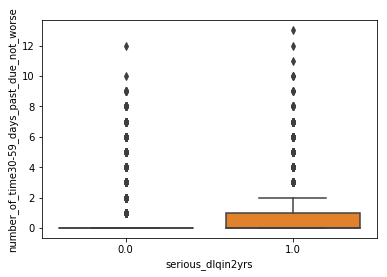

In [39]:
# Remove a couple of outliers with a value of 96 to be able to plot and compare distributions
x_data = credit_data[credit_data['number_of_time30-59_days_past_due_not_worse'] < 80]['serious_dlqin2yrs']
y_data = credit_data[credit_data['number_of_time30-59_days_past_due_not_worse'] < 80]['number_of_time30-59_days_past_due_not_worse']
sns.boxplot(x=x_data, y=y_data, orient='v' );

As we expected higher values for this column correspond with more delinquency. As we can notice from this two boxplot a value of 6.0 will be a satisfactory uppper limit. Similar columns will be evaluated in the same way, trying to stablish a maximum frequency for a value of 0.01 to stablish the upper limit.

In [40]:
credit_data.loc[credit_data['number_of_time30-59_days_past_due_not_worse'] > 6.0] = np.nan

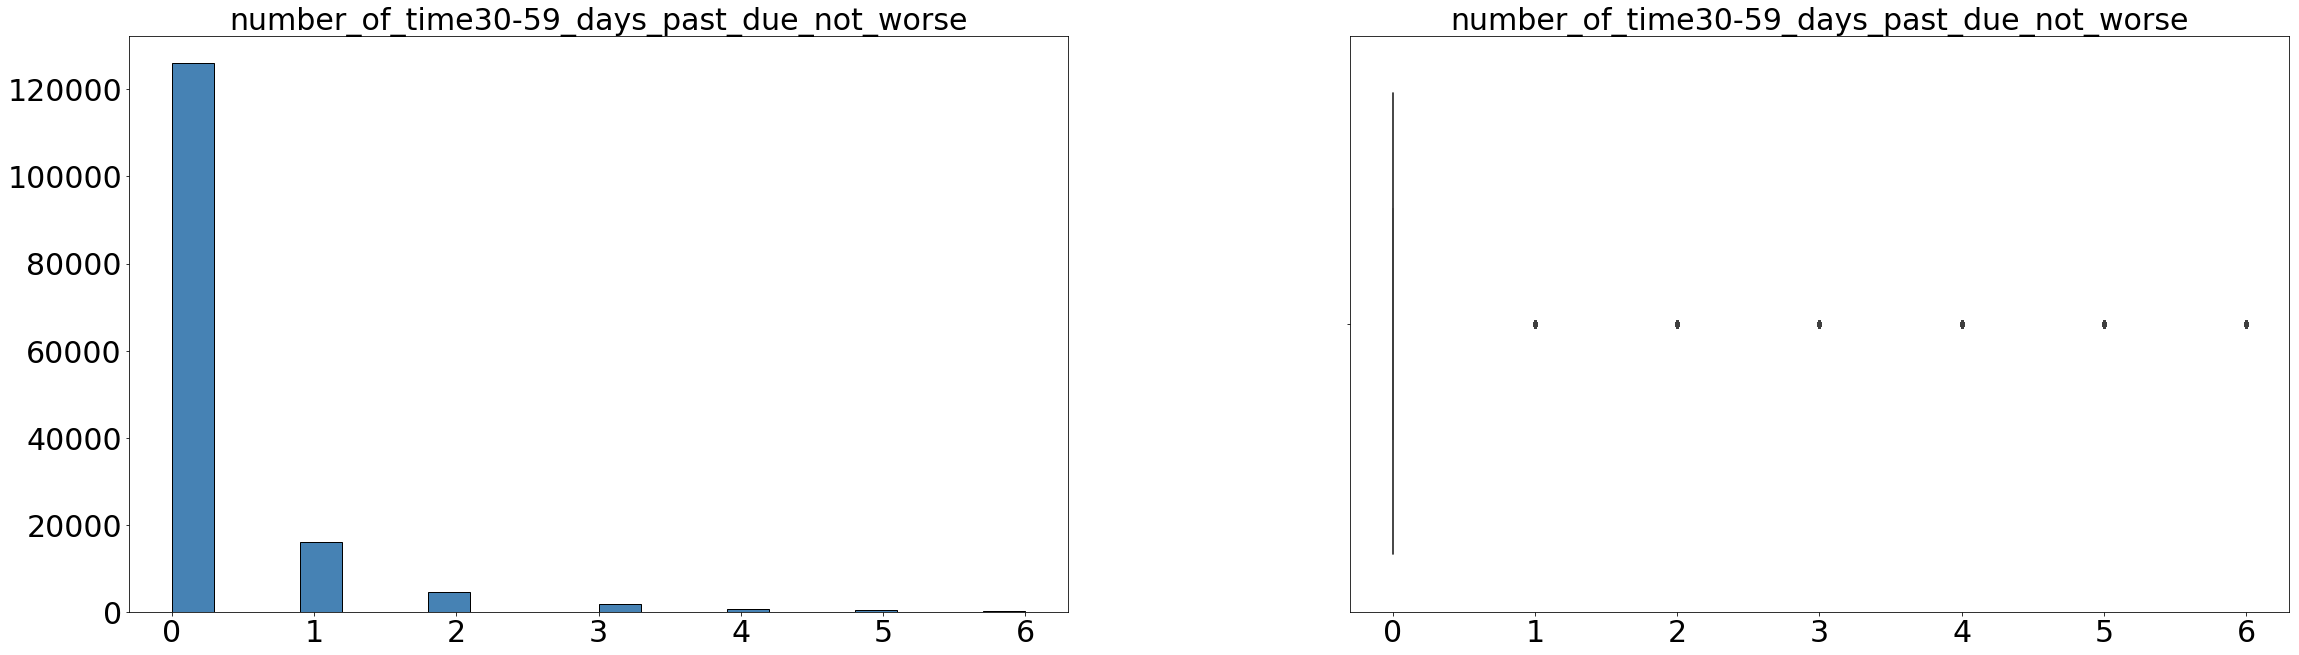

In [41]:
column_to_plot = 'number_of_time30-59_days_past_due_not_worse'

#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

#Plot boxplot
sns.boxplot( credit_data[[column_to_plot]], ax=axes_2)
    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)


#Show
plt.show()

## Column number_of_times90_days_late

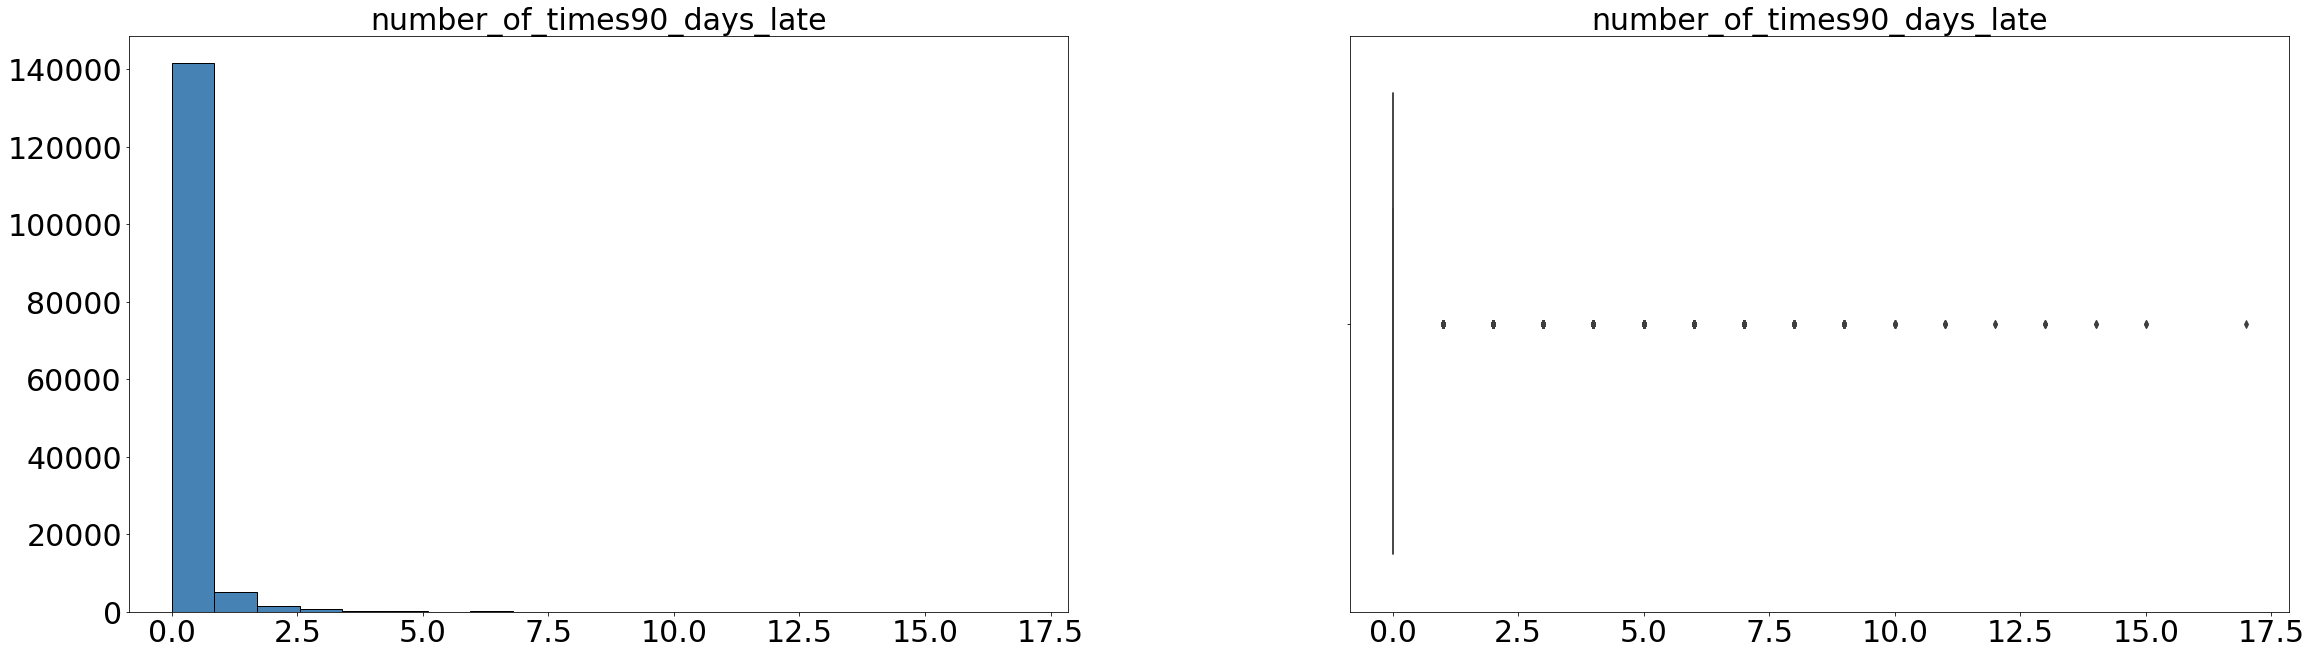

In [42]:
column_to_plot = 'number_of_times90_days_late'

#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

#Plot boxplot
sns.boxplot( credit_data[[column_to_plot]], ax=axes_2)
    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)


#Show
plt.show()

In [43]:
lower_bound, upper_bound, q01, q05, q95, q99 = utils.get_outlier_bounds(credit_data['number_of_times90_days_late'])
print('lower_bound: {0}'.format(lower_bound))
print('upper_bound: {0}'.format(upper_bound))
print('quantile 1: {0}'.format(q01))
print('quantile 5: {0}'.format(q05))
print('quantile 95: {0}'.format(q95))
print('quantile 99: {0}'.format(q99))

lower_bound: 0.0
upper_bound: 0.0
quantile 1: 0.0
quantile 5: 0.0
quantile 95: 1.0
quantile 99: 2.0


In [44]:
round(100*(credit_data[credit_data.number_of_times90_days_late>2.0].number_of_times90_days_late.value_counts() / credit_data.number_of_times90_days_late.shape[0]),3)

3.0     0.441
4.0     0.192
5.0     0.087
6.0     0.053
7.0     0.025
8.0     0.014
9.0     0.013
10.0    0.005
11.0    0.003
13.0    0.003
12.0    0.001
14.0    0.001
15.0    0.001
17.0    0.001
Name: number_of_times90_days_late, dtype: float64

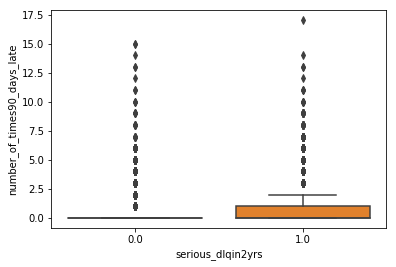

In [45]:
#View distribution of this column against serious_dlqin2yrs
x_data = credit_data['serious_dlqin2yrs']
y_data = credit_data['number_of_times90_days_late']
sns.boxplot(x=x_data, y=y_data, orient='v' );

Same case as the previous column, as a value of 4 stablish the previously defined frequency limit we will use this value as upper limit.

In [46]:
#Values greather than 4.0 will be discarded
credit_data.loc[credit_data['number_of_times90_days_late'] > 4.0] = np.nan

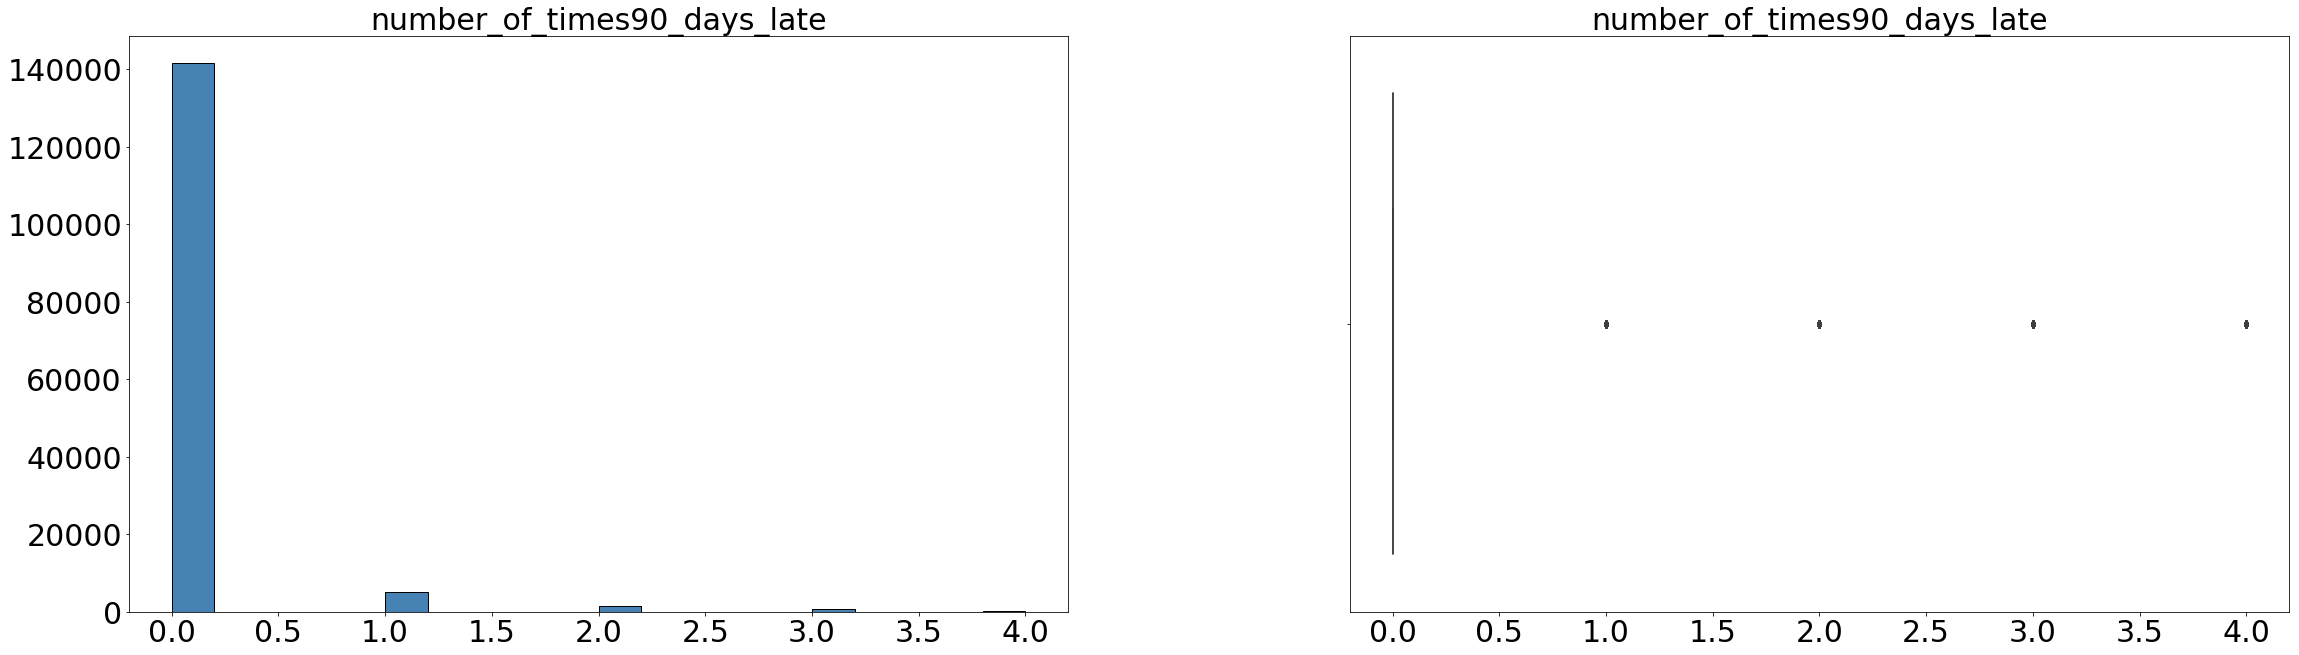

In [47]:
column_to_plot = 'number_of_times90_days_late'

#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

#Plot boxplot
sns.boxplot( credit_data[[column_to_plot]], ax=axes_2)
    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)


#Show
plt.show()

## Column number_real_estate_loans_or_lines

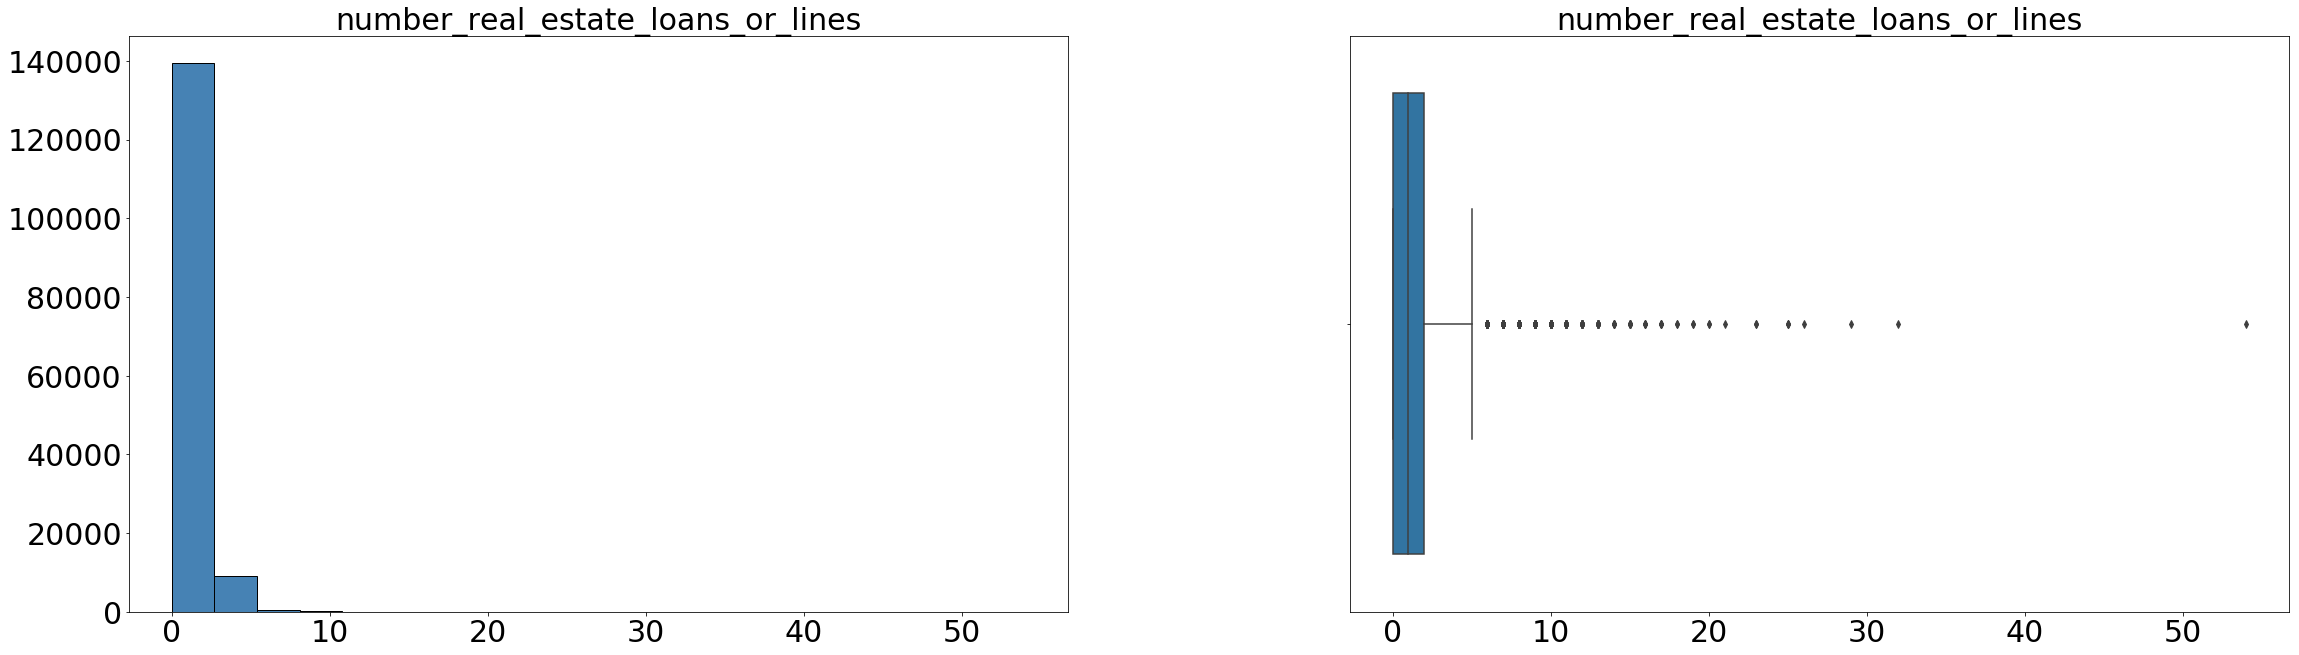

In [48]:
column_to_plot = 'number_real_estate_loans_or_lines'

#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

#Plot boxplot
sns.boxplot( credit_data[[column_to_plot]], ax=axes_2)
    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)


#Show
plt.show()

In [49]:
lower_bound, upper_bound, q01, q05, q95, q99 = utils.get_outlier_bounds(credit_data['number_real_estate_loans_or_lines'])
print('lower_bound: {0}'.format(lower_bound))
print('upper_bound: {0}'.format(upper_bound))
print('quantile 1: {0}'.format(q01))
print('quantile 5: {0}'.format(q05))
print('quantile 95: {0}'.format(q95))
print('quantile 99: {0}'.format(q99))

lower_bound: -3.0
upper_bound: 5.0
quantile 1: 0.0
quantile 5: 0.0
quantile 95: 3.0
quantile 99: 4.0


A negative number doesn't makes any sense in this context. We will study data beyond quantile 99

In [50]:
round(100*(credit_data[credit_data['number_real_estate_loans_or_lines'] > 4.0].number_real_estate_loans_or_lines.value_counts() / credit_data['number_real_estate_loans_or_lines'].shape[0]), 3)

5.0     0.457
6.0     0.211
7.0     0.113
8.0     0.061
9.0     0.052
10.0    0.023
11.0    0.015
12.0    0.012
13.0    0.010
15.0    0.005
14.0    0.003
16.0    0.003
17.0    0.003
25.0    0.002
23.0    0.001
18.0    0.001
19.0    0.001
20.0    0.001
32.0    0.001
54.0    0.001
21.0    0.001
29.0    0.001
26.0    0.001
Name: number_real_estate_loans_or_lines, dtype: float64

In [51]:
#Values greather than 7.0 will be discarded
credit_data.loc[credit_data['number_real_estate_loans_or_lines'] > 7.0] = np.nan

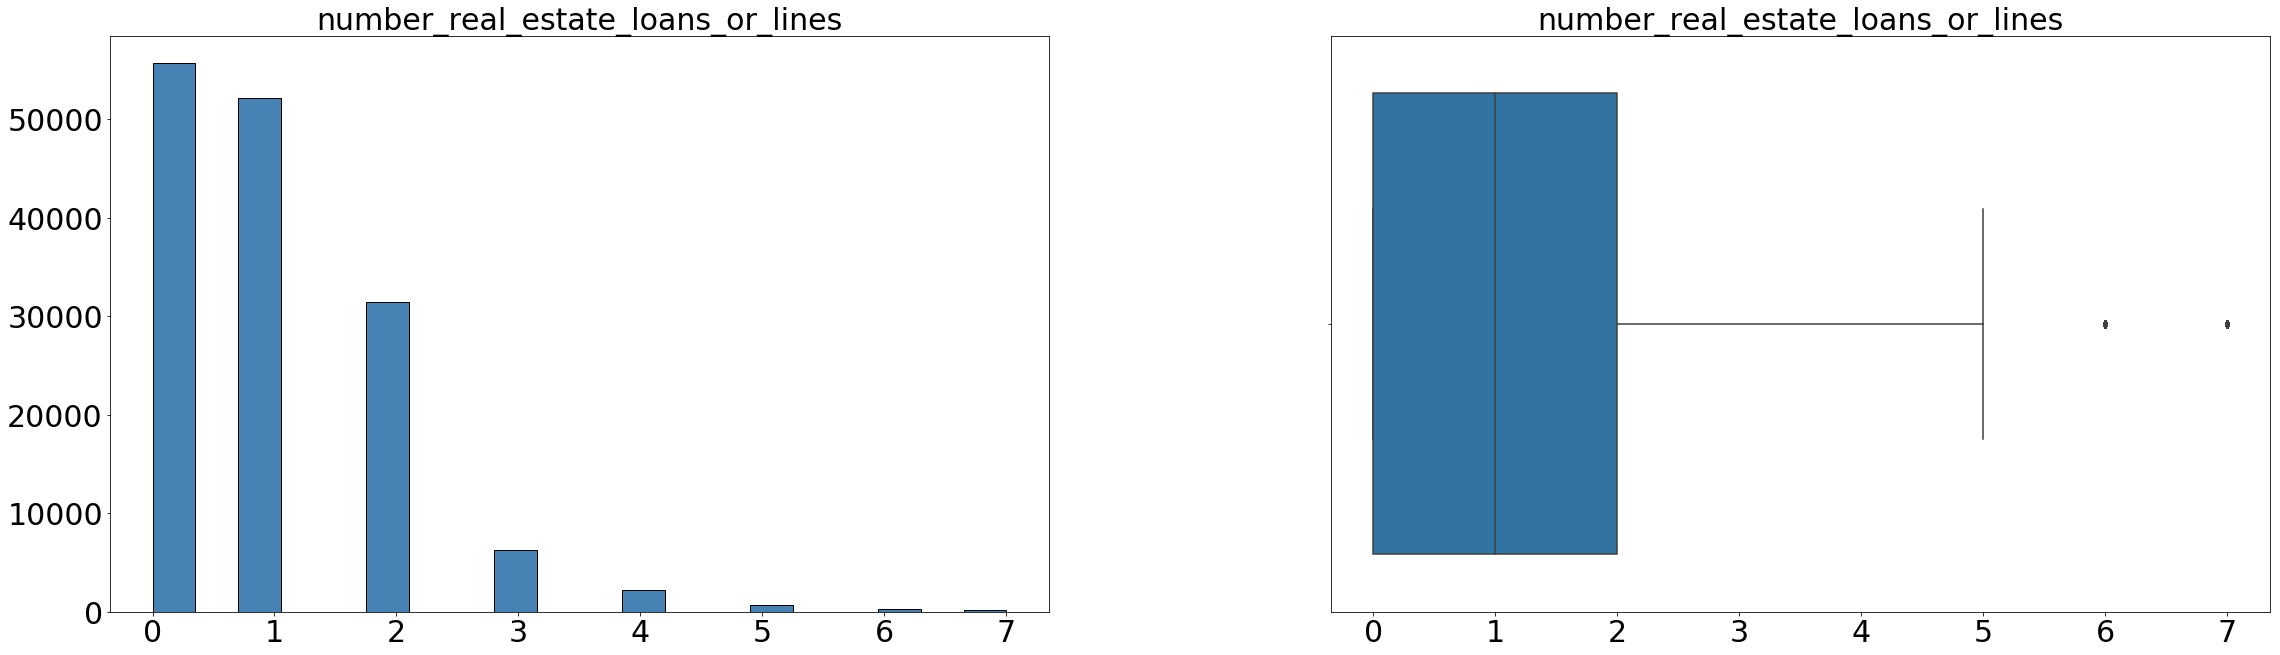

In [52]:
column_to_plot = 'number_real_estate_loans_or_lines'

#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

#Plot boxplot
sns.boxplot( credit_data[[column_to_plot]], ax=axes_2)
    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)


#Show
plt.show()

## Columns number_of_time60-89_days_past_due_not_worse

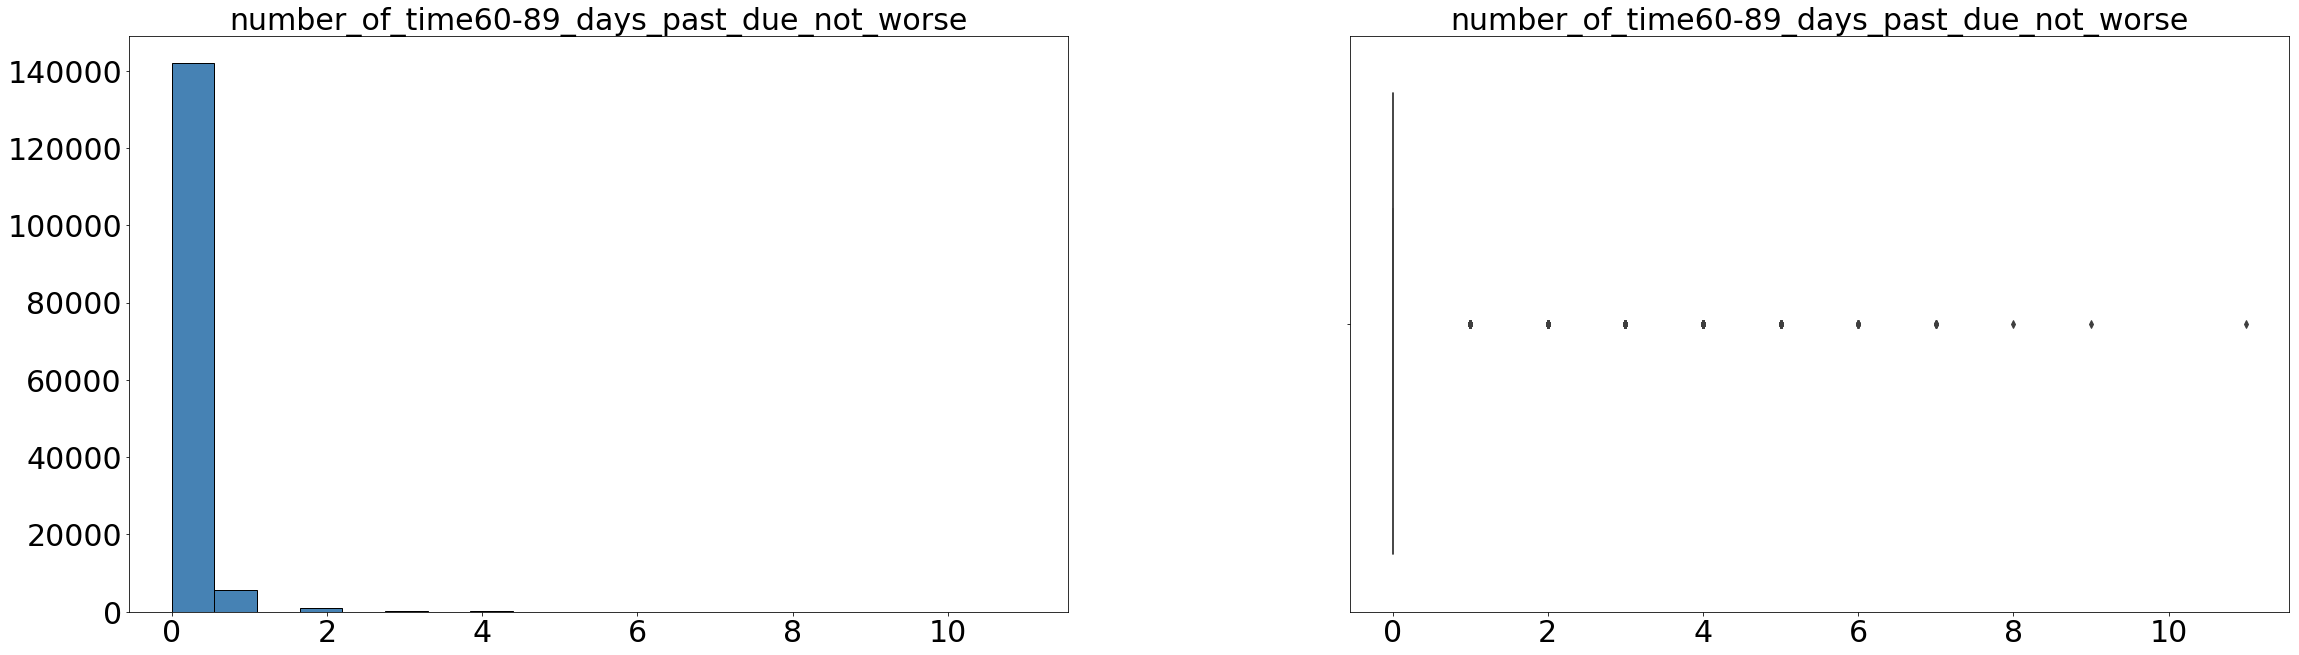

In [53]:
column_to_plot = 'number_of_time60-89_days_past_due_not_worse'

#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

#Plot boxplot
sns.boxplot( credit_data[[column_to_plot]], ax=axes_2)
    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)


#Show
plt.show()

In [54]:
lower_bound, upper_bound, q01, q05, q95, q99 = utils.get_outlier_bounds(credit_data['number_of_time60-89_days_past_due_not_worse'])
print('lower_bound: {0}'.format(lower_bound))
print('upper_bound: {0}'.format(upper_bound))
print('quantile 1: {0}'.format(q01))
print('quantile 5: {0}'.format(q05))
print('quantile 95: {0}'.format(q95))
print('quantile 99: {0}'.format(q99))

lower_bound: 0.0
upper_bound: 0.0
quantile 1: 0.0
quantile 5: 0.0
quantile 95: 0.0
quantile 99: 2.0


In [55]:
round(100*(credit_data[credit_data['number_of_time60-89_days_past_due_not_worse']>2.0]['number_of_time60-89_days_past_due_not_worse'].value_counts()/credit_data['number_of_time60-89_days_past_due_not_worse'].shape[0]), 4)

3.0     0.1973
4.0     0.0633
5.0     0.0180
6.0     0.0087
7.0     0.0047
9.0     0.0007
8.0     0.0007
11.0    0.0007
Name: number_of_time60-89_days_past_due_not_worse, dtype: float64

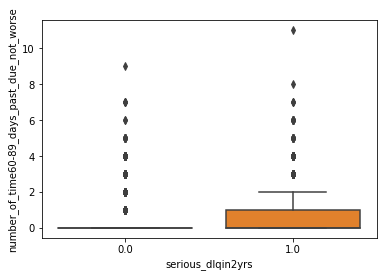

In [56]:
#View distribution of this column against serious_dlqin2yrs
x_data = credit_data['serious_dlqin2yrs']
y_data = credit_data['number_of_time60-89_days_past_due_not_worse']
sns.boxplot(x=x_data, y=y_data, orient='v' );

In [57]:
#Values greather than 4.0 will be discarded
credit_data[credit_data['number_of_time60-89_days_past_due_not_worse'] > 4.0] = np.nan

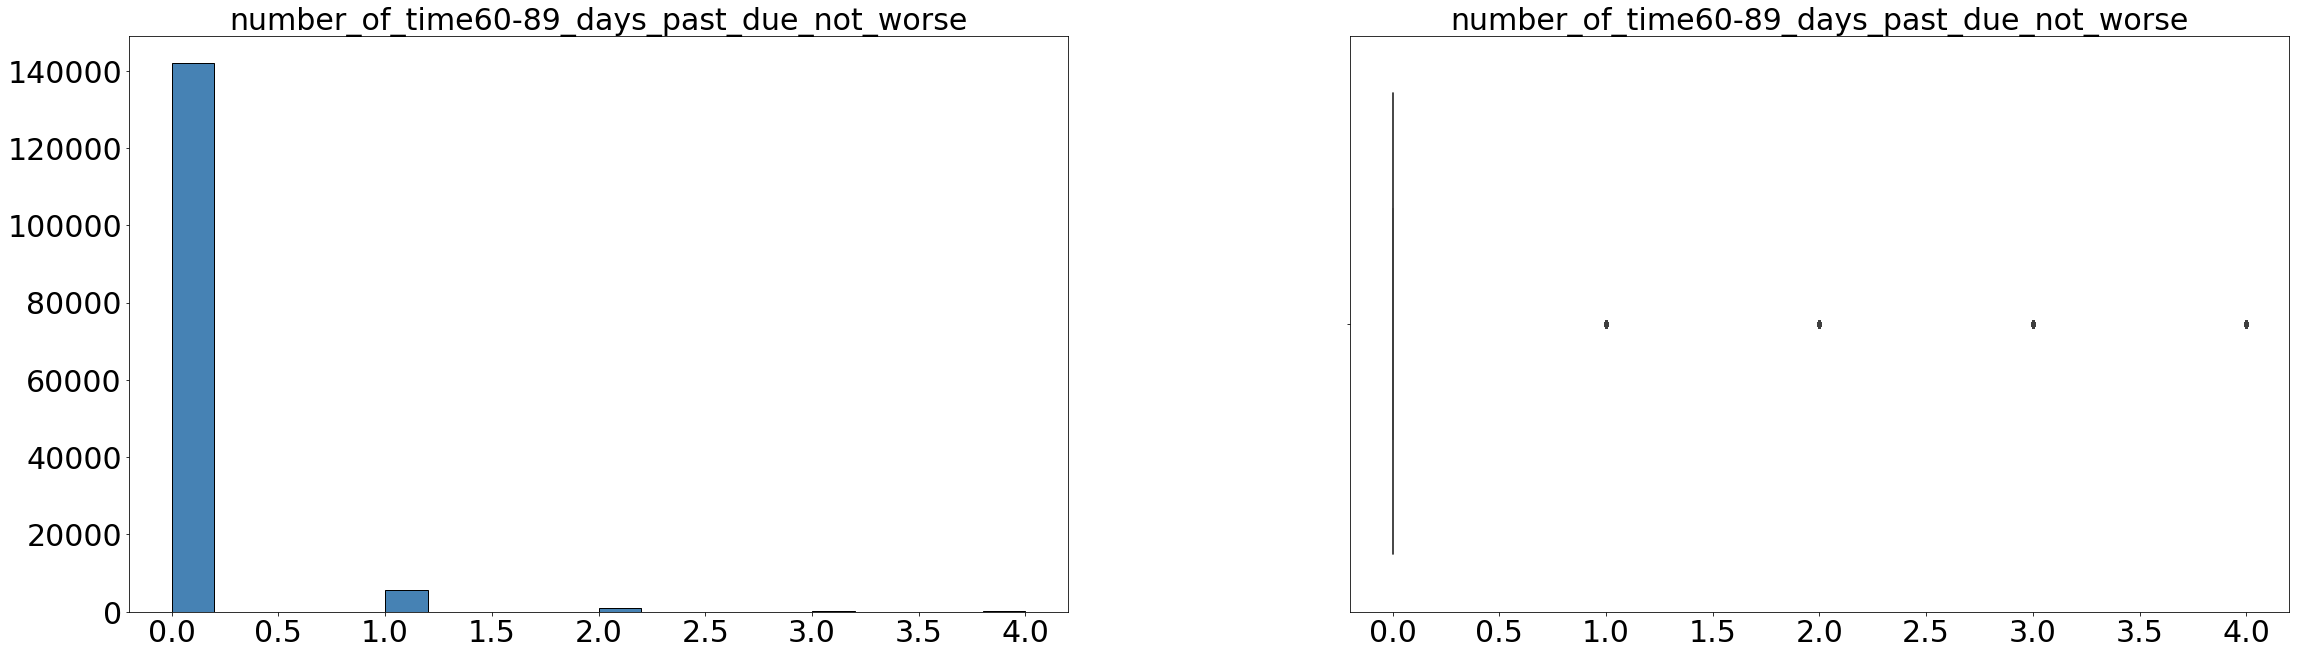

In [58]:
column_to_plot = 'number_of_time60-89_days_past_due_not_worse'

#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

#Plot boxplot
sns.boxplot( credit_data[[column_to_plot]], ax=axes_2)
    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)


#Show
plt.show()

## Column number_of_dependents

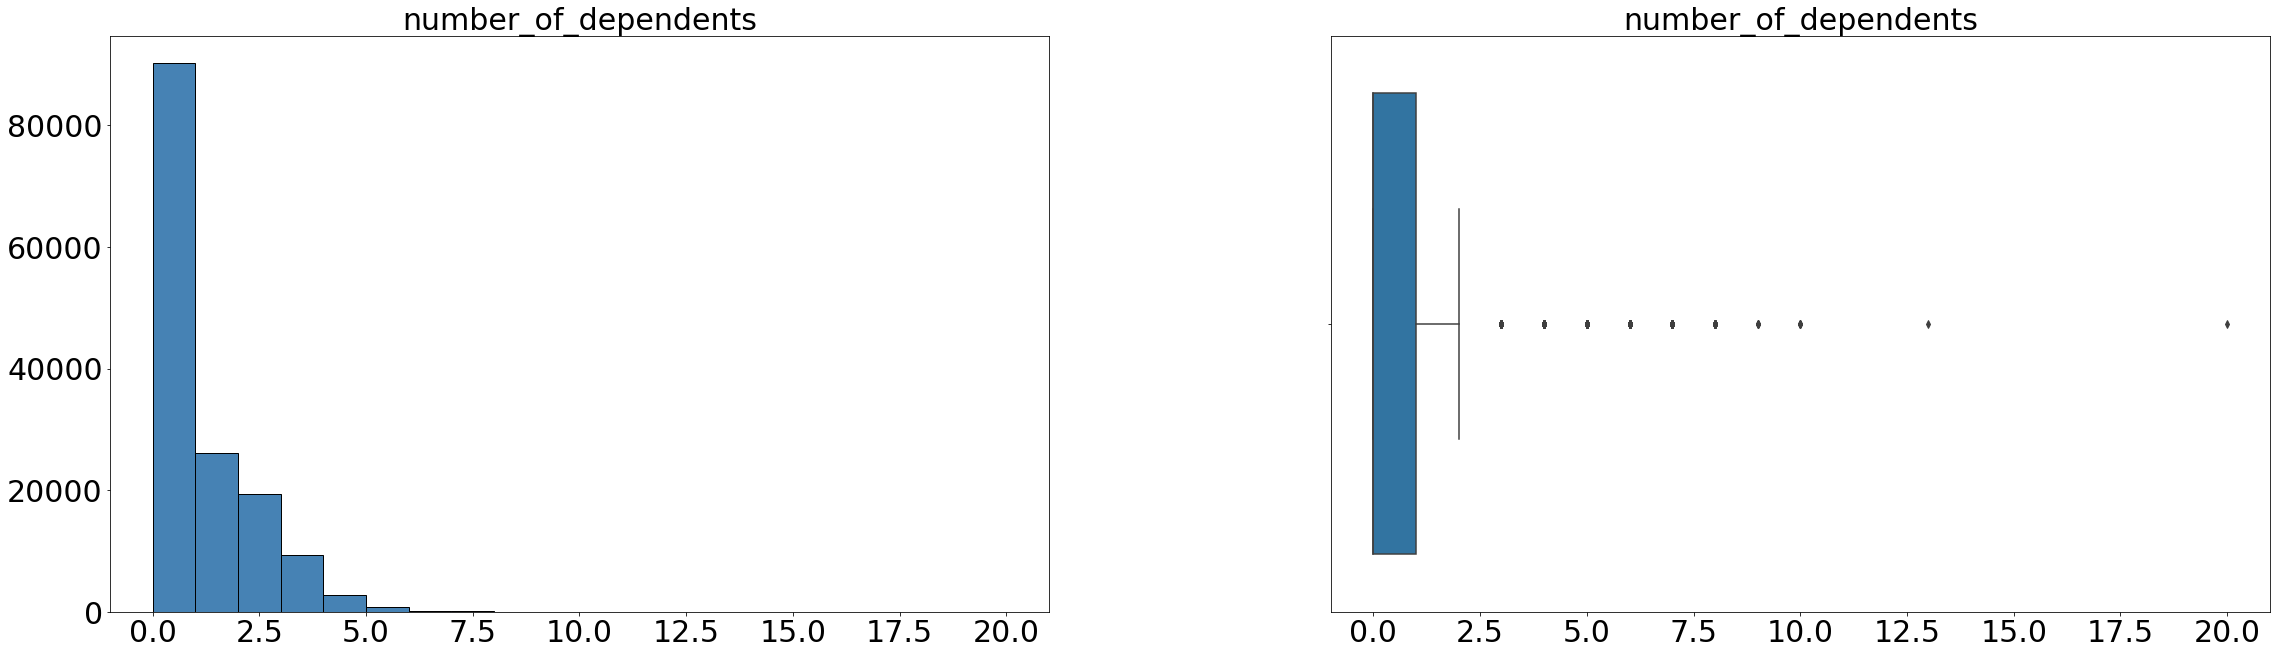

In [59]:
column_to_plot = 'number_of_dependents'


#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

#Plot boxplot
sns.boxplot( credit_data[[column_to_plot]], ax=axes_2)
    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)


#Show
plt.show()

In [60]:
lower_bound, upper_bound, q01, q05, q95, q99 = utils.get_outlier_bounds(credit_data['number_of_dependents'])
print('lower_bound: {0}'.format(lower_bound))
print('upper_bound: {0}'.format(upper_bound))
print('quantile 1: {0}'.format(q01))
print('quantile 5: {0}'.format(q05))
print('quantile 95: {0}'.format(q95))
print('quantile 99: {0}'.format(q99))

lower_bound: -1.5
upper_bound: 2.5
quantile 1: 0.0
quantile 5: 0.0
quantile 95: 3.0
quantile 99: 4.0


In [61]:
round(100*(credit_data[credit_data['number_of_dependents'] > 4.0].number_of_dependents.value_counts() / credit_data['number_of_dependents'].shape[0]), 2)

5.0     0.49
6.0     0.11
7.0     0.03
8.0     0.02
9.0     0.00
10.0    0.00
13.0    0.00
20.0    0.00
Name: number_of_dependents, dtype: float64

In [62]:
#We will keep families with a maximum of 6 memebers (who depends on the borrower)
credit_data[credit_data['number_of_dependents'] > 6.0] = np.nan

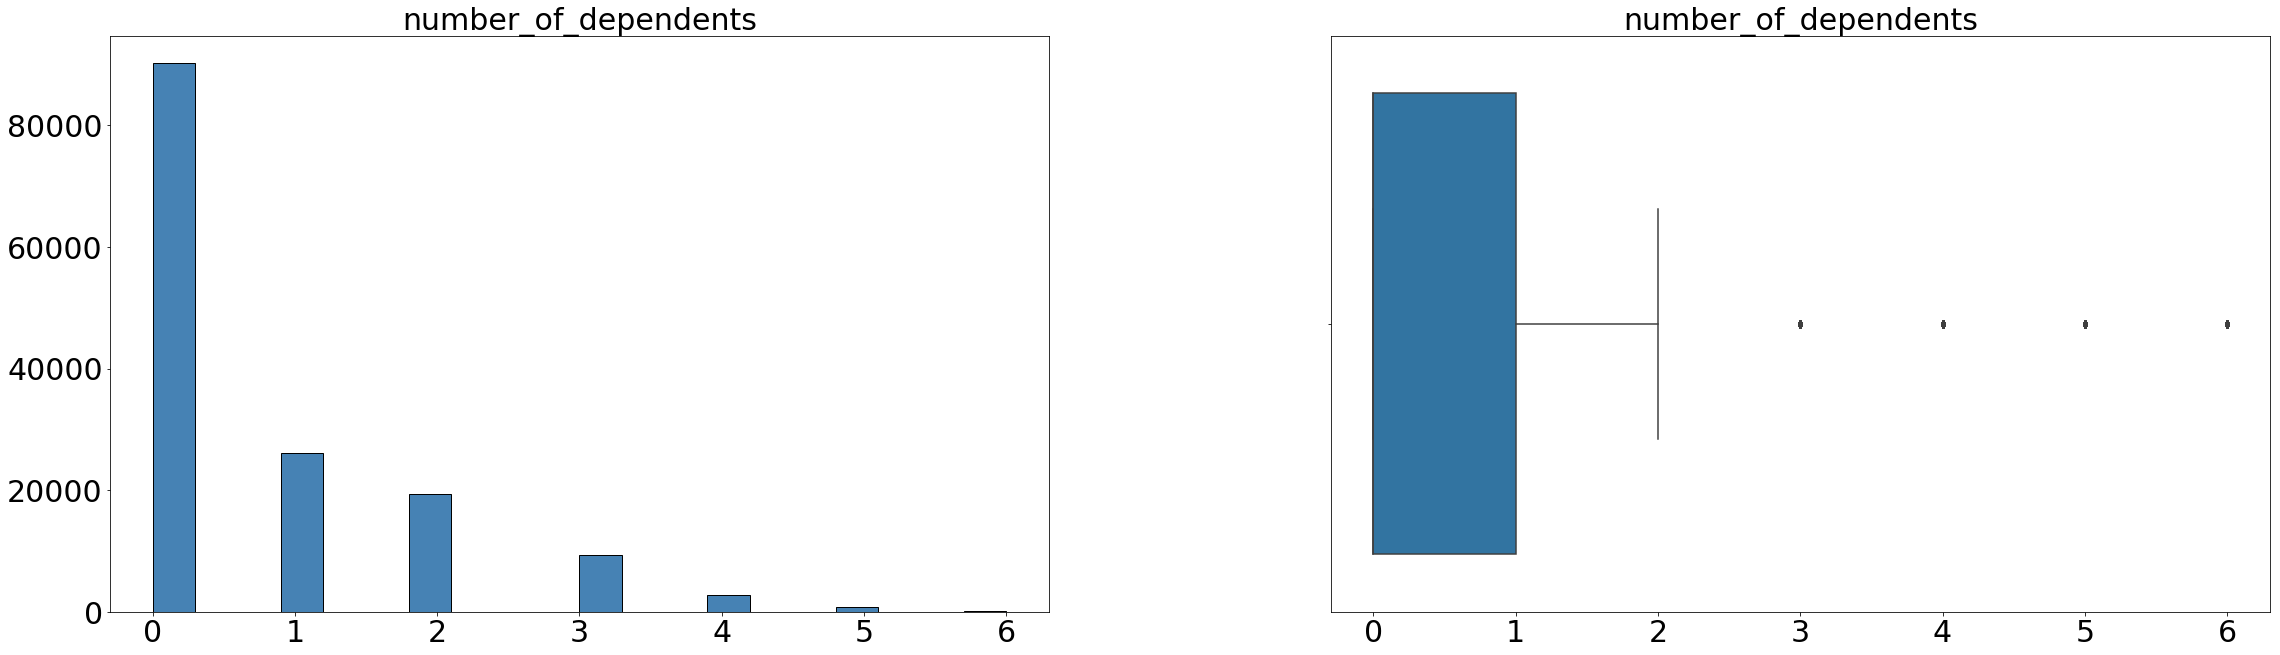

In [63]:
column_to_plot = 'number_of_dependents'


#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

#Plot boxplot
sns.boxplot( credit_data[[column_to_plot]], ax=axes_2)
    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)


#Show
plt.show()

## Column revolving_utilization_of_unsecured_lines

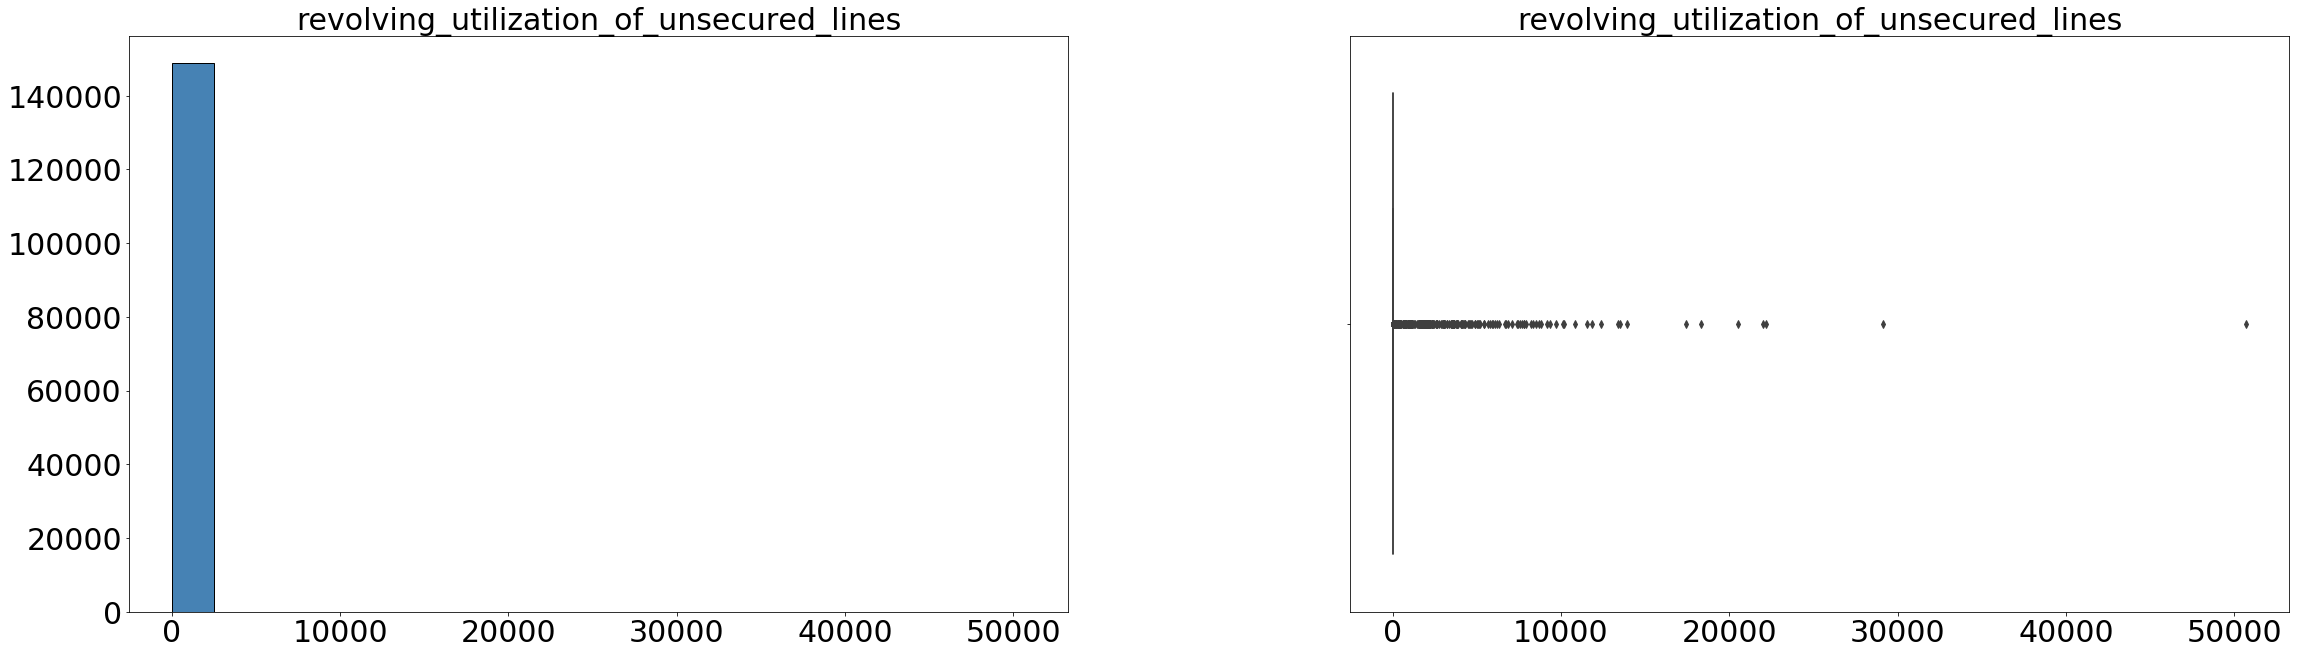

In [64]:
column_to_plot = 'revolving_utilization_of_unsecured_lines'


#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

#Plot boxplot
sns.boxplot( credit_data[[column_to_plot]], ax=axes_2)
    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)


#Show
plt.show()

In [65]:
lower_bound, upper_bound, q01, q05, q95, q99 = utils.get_outlier_bounds(credit_data['revolving_utilization_of_unsecured_lines'])
print('lower_bound: {0}'.format(lower_bound))
print('upper_bound: {0}'.format(upper_bound))
print('quantile 1: {0}'.format(q01))
print('quantile 5: {0}'.format(q05))
print('quantile 95: {0}'.format(q95))
print('quantile 99: {0}'.format(q99))

lower_bound: -0.75
upper_bound: 1.33
quantile 1: 0.0
quantile 5: 0.0
quantile 95: 1.0
quantile 99: 1.09


In [66]:
round(100*(credit_data[credit_data['revolving_utilization_of_unsecured_lines'] > 1.09].revolving_utilization_of_unsecured_lines.value_counts() / credit_data['revolving_utilization_of_unsecured_lines'].shape[0]), 4) 

1.282392       0.0020
1.101796       0.0020
1.105788       0.0020
1.481038       0.0020
1.099800       0.0020
1.483034       0.0020
1.421927       0.0020
1.180328       0.0013
1.093977       0.0013
1.156146       0.0013
1.119601       0.0013
1.091514       0.0013
1.153693       0.0013
1.478405       0.0013
1.566866       0.0013
1.376623       0.0013
1.491694       0.0013
1.916944       0.0013
1.274542       0.0013
1.257485       0.0013
2.079734       0.0013
1.185629       0.0013
1.139535       0.0013
1.661130       0.0013
1.114863       0.0013
1.127745       0.0013
1.272425       0.0013
1.485050       0.0013
1.163673       0.0013
1.213786       0.0013
                ...  
1.216797       0.0007
2.258964       0.0007
1.667614       0.0007
1.513981       0.0007
1.151000       0.0007
1.103931       0.0007
3.875123       0.0007
1.233397       0.0007
1.093837       0.0007
1.132335       0.0007
1.511145       0.0007
1.167296       0.0007
1.203728       0.0007
5186.000000    0.0007
1.132116  

base on this data we will use percentile 01 and 99 as limits

In [67]:
credit_data = utils.treat_outliers(data_in=credit_data, column_names=['revolving_utilization_of_unsecured_lines'], method='0199', value='mean')

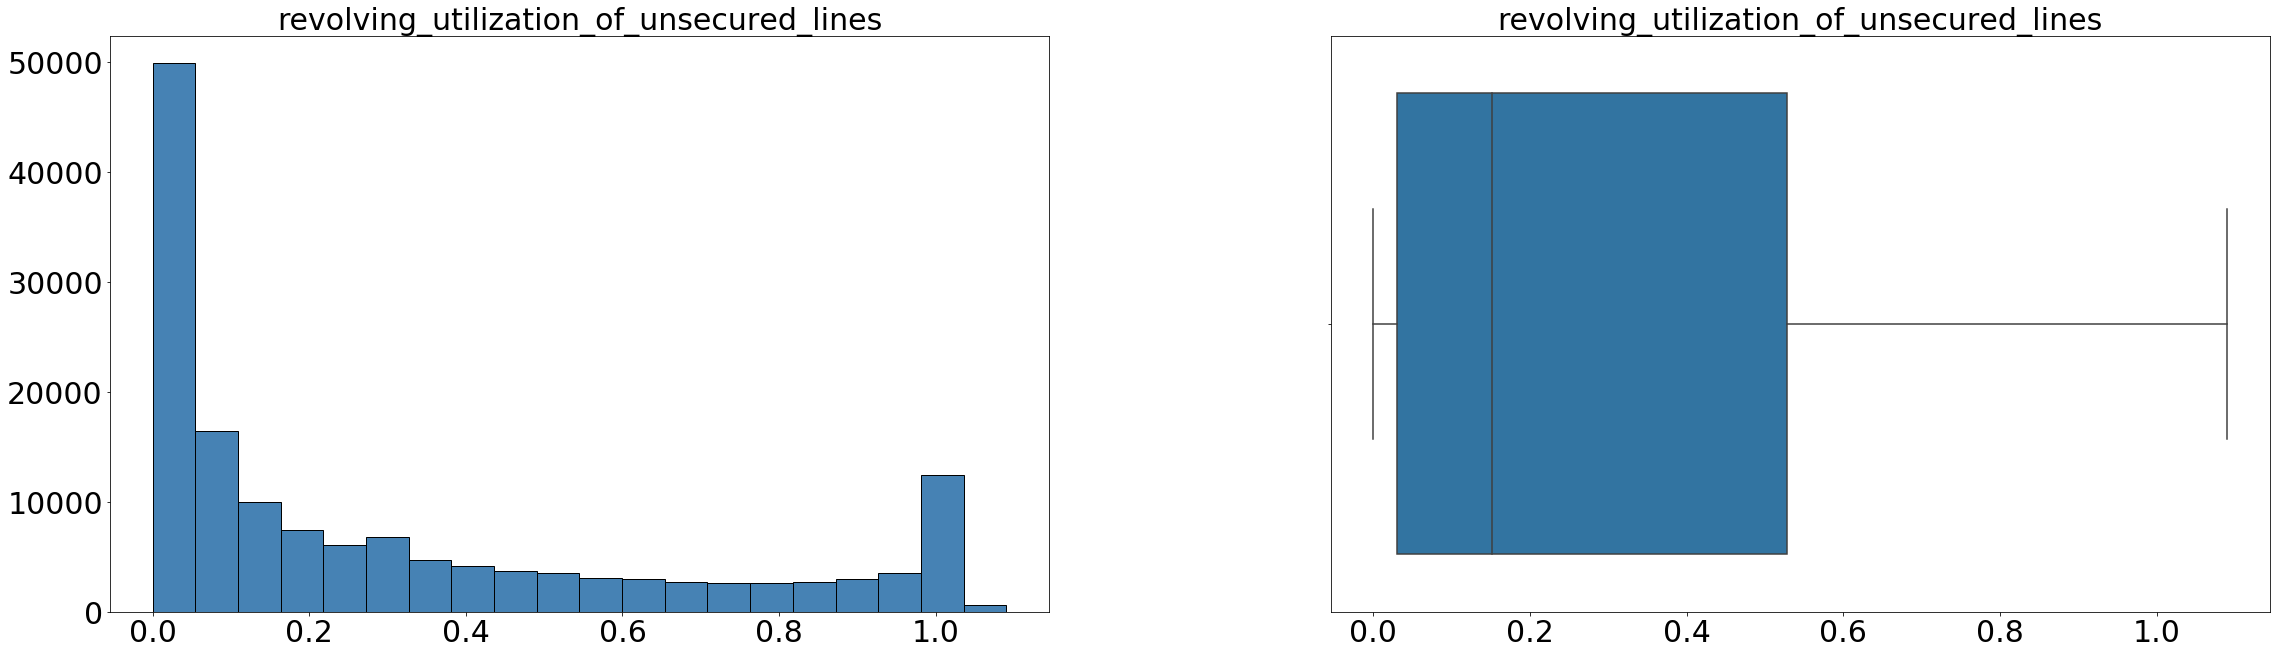

In [68]:
column_to_plot = 'revolving_utilization_of_unsecured_lines'


#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

#Plot boxplot
sns.boxplot( credit_data[[column_to_plot]], ax=axes_2)
    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)


#Show
plt.show()

## Column debt ratio

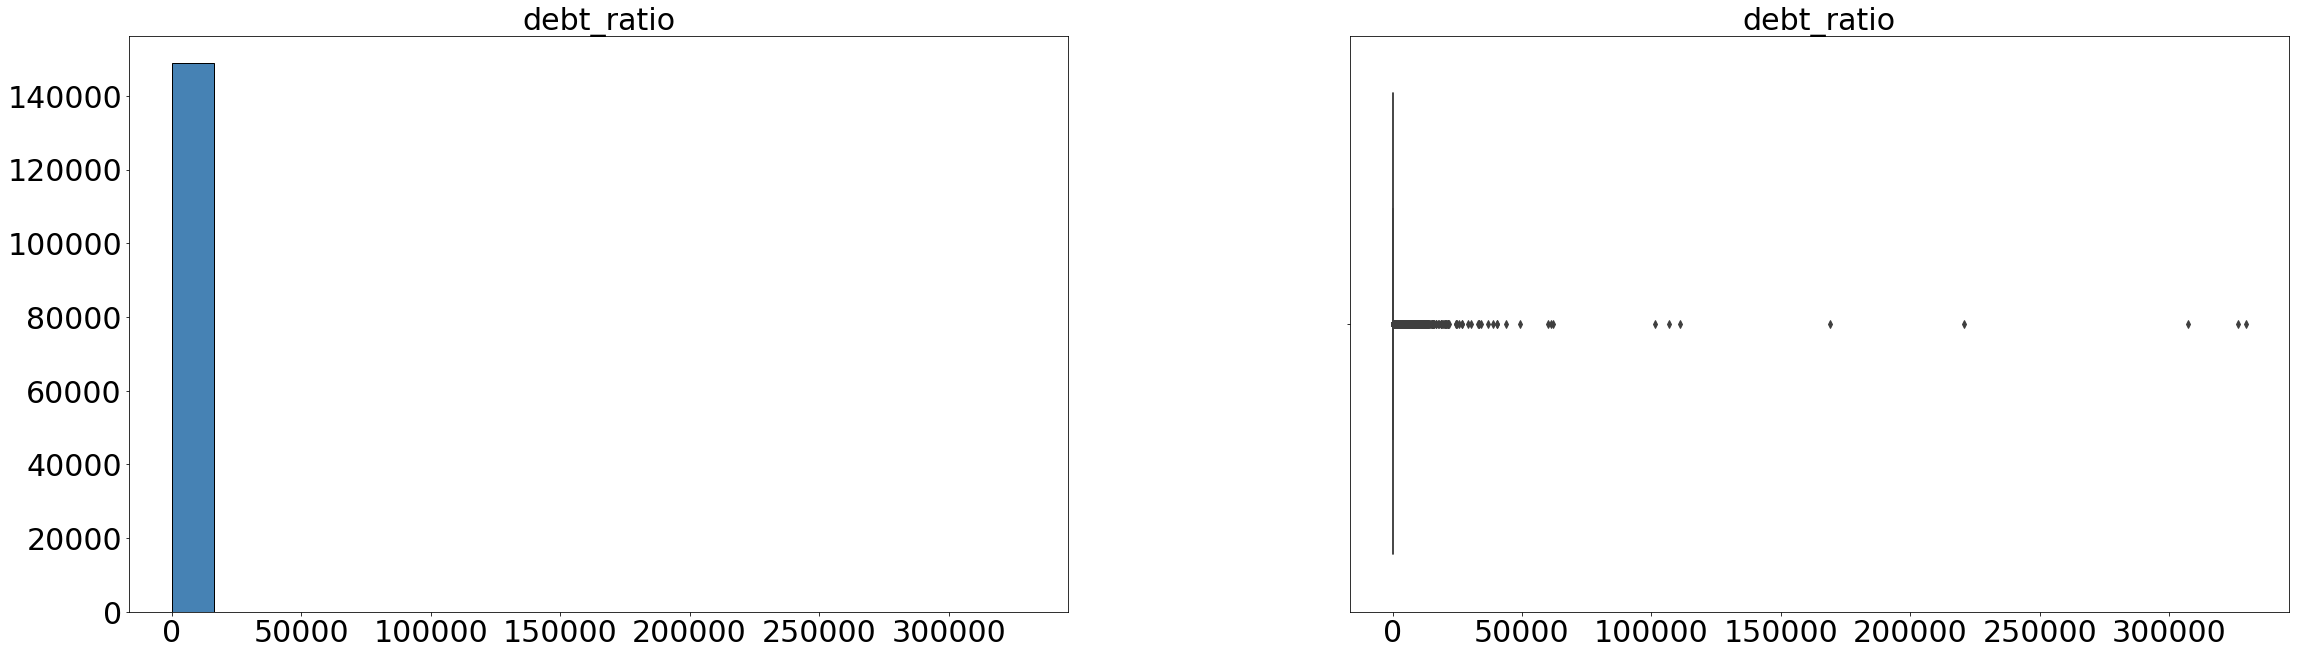

In [69]:
column_to_plot = 'debt_ratio'


#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

#Plot boxplot
sns.boxplot( credit_data[[column_to_plot]], ax=axes_2)
    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)


#Show
plt.show()

In [70]:
lower_bound, upper_bound, q01, q05, q95, q99 = utils.get_outlier_bounds(credit_data['debt_ratio'])
print('lower_bound: {0}'.format(lower_bound))
print('upper_bound: {0}'.format(upper_bound))
print('quantile 1: {0}'.format(q01))
print('quantile 5: {0}'.format(q05))
print('quantile 95: {0}'.format(q95))
print('quantile 99: {0}'.format(q99))

lower_bound: -0.86
upper_bound: 1.9
quantile 1: 0.0
quantile 5: 0.0
quantile 95: 2446.0
quantile 99: 4937.13


In [71]:
# To not to loose this value we will apply the value in percentile 01 and 99 to outliers
credit_data = utils.treat_outliers(data_in=credit_data, column_names=['debt_ratio'], method='0199', value='min_max_value')

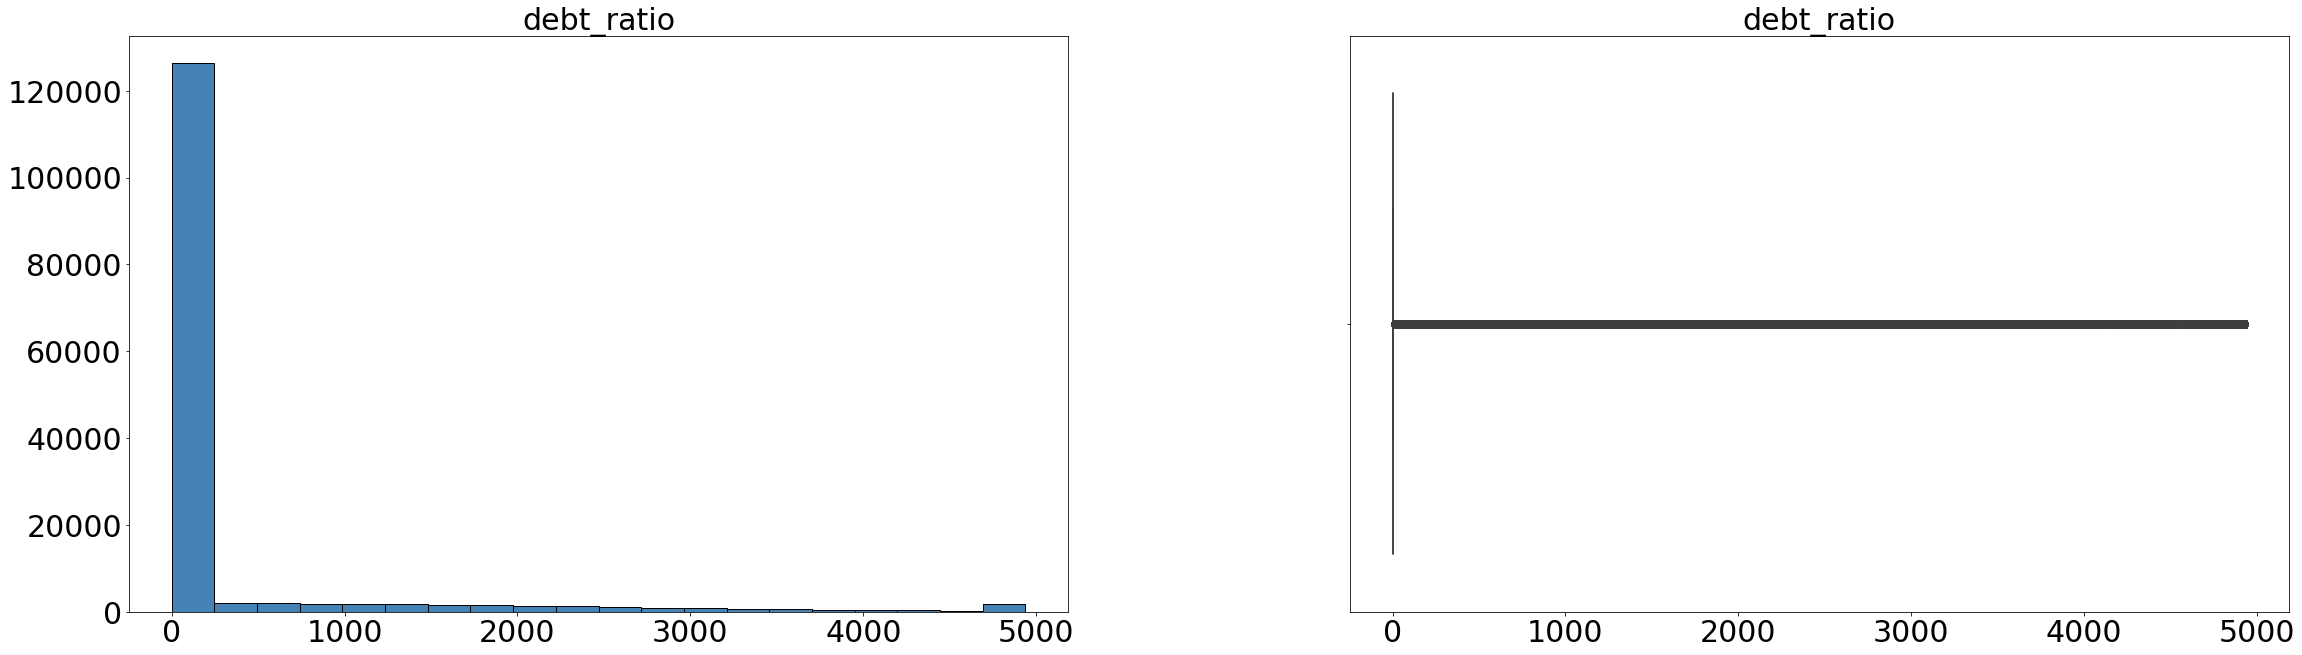

In [72]:
column_to_plot = 'debt_ratio'


#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

#Plot boxplot
sns.boxplot( credit_data[[column_to_plot]], ax=axes_2)
    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)


#Show
plt.show()

## Column monthly_income

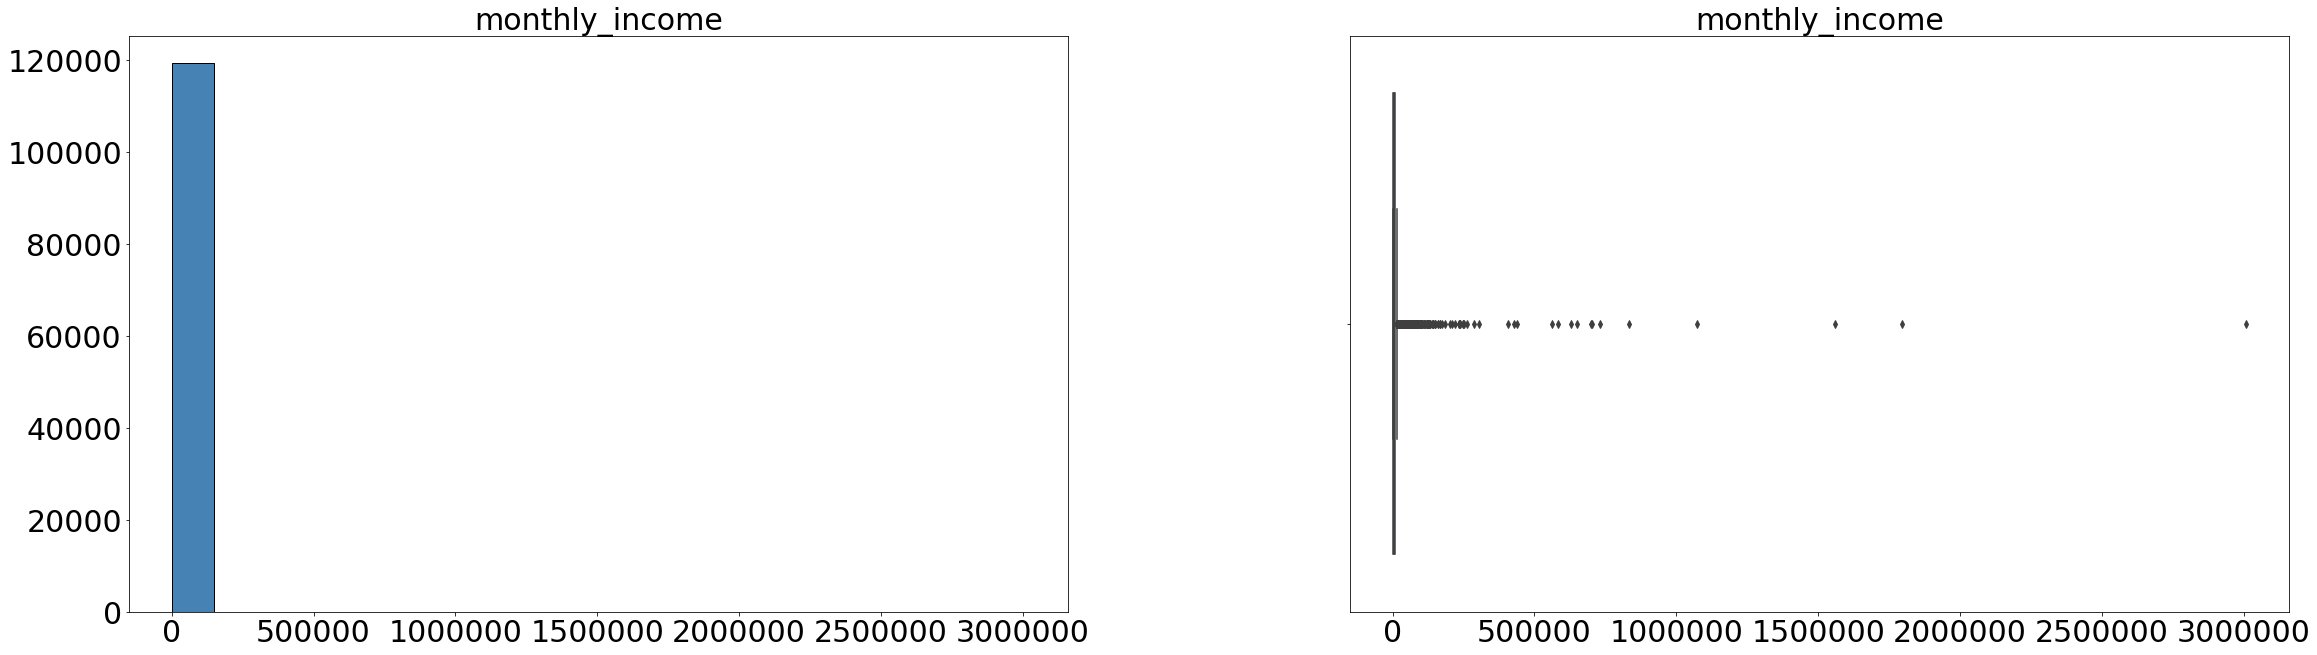

In [73]:
column_to_plot = 'monthly_income'


#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

#Plot boxplot
sns.boxplot( credit_data[[column_to_plot]], ax=axes_2)
    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)


#Show
plt.show()

In [74]:
lower_bound, upper_bound, q01, q05, q95, q99 = utils.get_outlier_bounds(credit_data['monthly_income'])
print('lower_bound: {0}'.format(lower_bound))
print('upper_bound: {0}'.format(upper_bound))
print('quantile 1: {0}'.format(q01))
print('quantile 5: {0}'.format(q05))
print('quantile 95: {0}'.format(q95))
print('quantile 99: {0}'.format(q99))

lower_bound: -3836.0
upper_bound: 15460.0
quantile 1: 0.0
quantile 5: 1300.0
quantile 95: 14501.35
quantile 99: 25000.0


/Users/rbechler/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


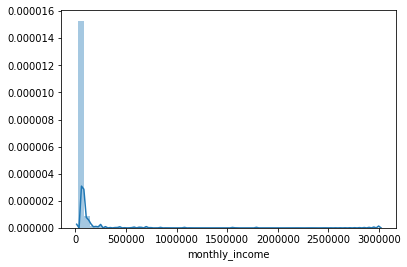

In [75]:
# Let's explore values beyond percentile 99
sns.distplot(credit_data[credit_data.monthly_income > 25000].monthly_income);

Rich people can be less than 1% of the people in this database, that's why we will explore boyond percentile 99

/Users/rbechler/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


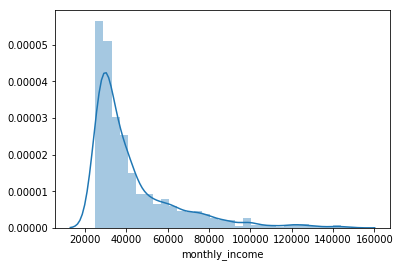

In [76]:
# we will stablish a maximum limit of 150000
sns.distplot(credit_data[(credit_data.monthly_income > 25000) & (credit_data.monthly_income < 150000)].monthly_income);

This feature is very skewed and it also has lots of NA's. We will take a maximum value of 150000 and we will study data above this value to decide what to do with it.

In [77]:
credit_data[credit_data.monthly_income > 150000].shape[0]

35

In [78]:
# Data over 150000 will be assigned with -1 (this is to be able to input the nan values and then remove this outliers)
credit_data[credit_data.monthly_income > 150000] = -1

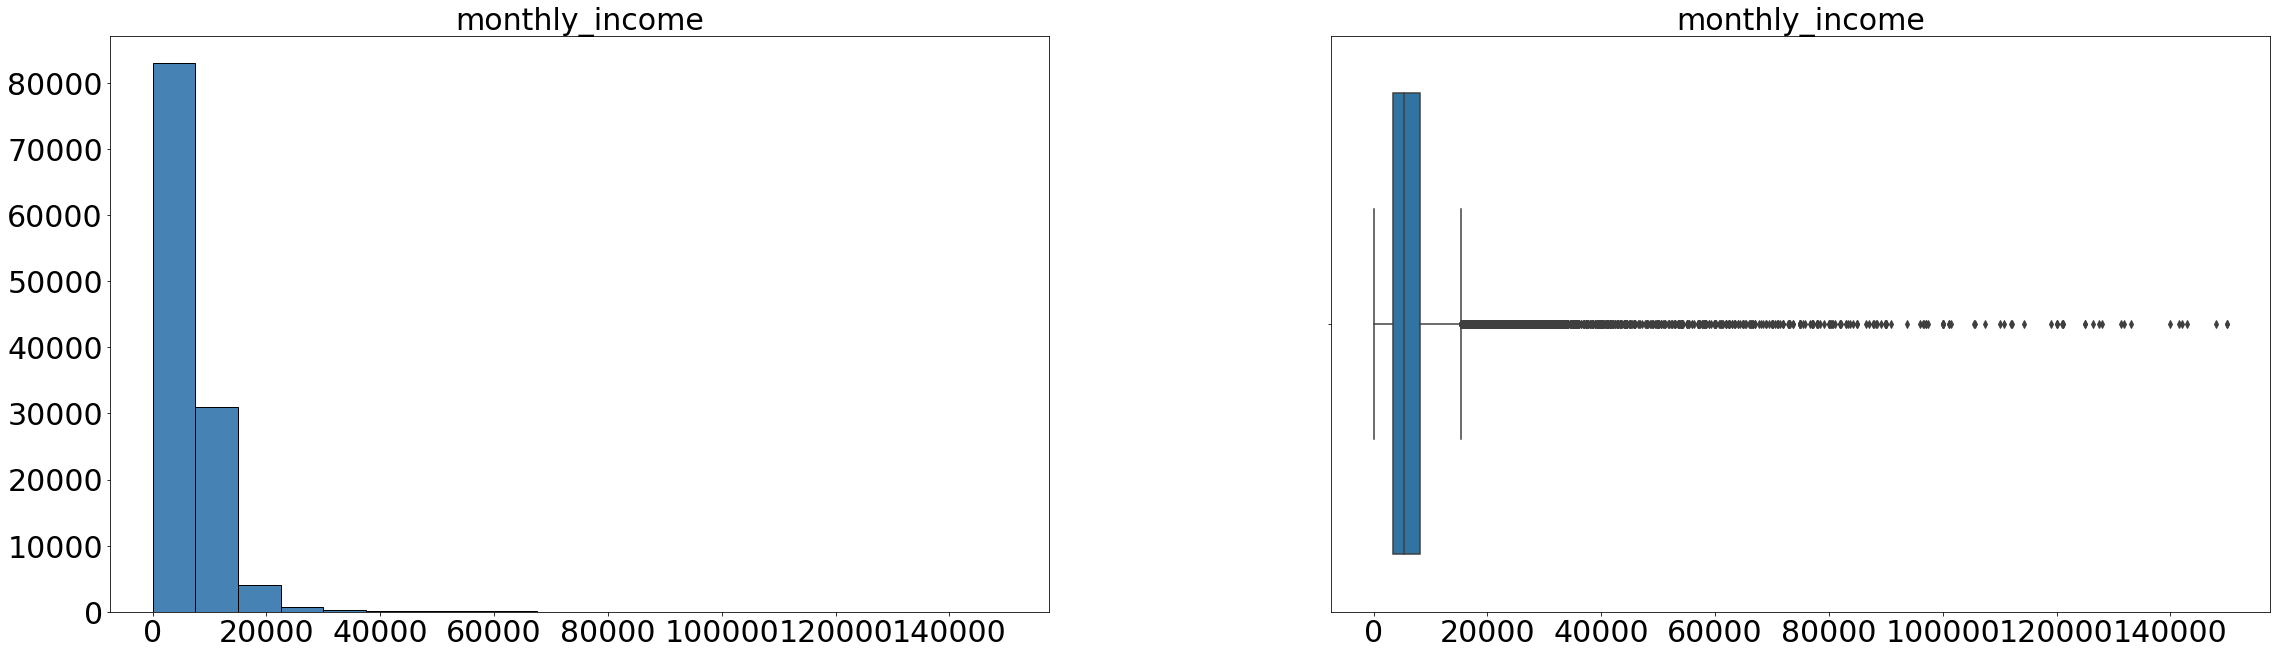

In [79]:
column_to_plot = 'monthly_income'


#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

#Plot boxplot
sns.boxplot( credit_data[[column_to_plot]], ax=axes_2)
    
#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)


#Show
plt.show()

# Data Inputation

We will study if there is any correlation that help us to define what to do with the NAs in the column monthly income.

In [80]:
# First we are going drop out missing values from all columns but 'monthly_income, borrower_id, nor  'serious_dlqin2yrs'
credit_data_no_nan = credit_data.dropna(subset=['revolving_utilization_of_unsecured_lines', 'age',
       'number_of_time30-59_days_past_due_not_worse', 'debt_ratio',
       'number_of_open_credit_lines_and_loans',
       'number_of_times90_days_late', 'number_real_estate_loans_or_lines',
       'number_of_time60-89_days_past_due_not_worse', 'number_of_dependents'])


#Now filter rows with outliers in monthly_income 
credit_data_no_nan = credit_data_no_nan[credit_data_no_nan.monthly_income != -1]


In [81]:
print('lenght of credit_data after NaN removal: {0}'.format(credit_data_no_nan.shape[0]))

lenght of credit_data after NaN removal: 148807


In [82]:
# For credit_data_no_nan how many null values are there in column "monthly_income"?
print("Amount of null values in monthly_income: {0}".format(credit_data_no_nan[credit_data_no_nan.monthly_income.isnull()].shape[0]))

Amount of null values in monthly_income: 29453


We are going to use K-nearest-neighbors to impute monthly_income missing values. To do this we have to split the labeled data from data with the values to impute. 

In [83]:
# Then we will split between train set and data to predict
credit_data_train = credit_data_no_nan[credit_data_no_nan.monthly_income.notnull()]
credit_data_predict = credit_data_no_nan[credit_data_no_nan.monthly_income.isnull()]

In [84]:
# Finally we will split X_labeled and y, and X_predict
X_labaled = credit_data_train[['revolving_utilization_of_unsecured_lines', 'age',
       'number_of_time30-59_days_past_due_not_worse', 'debt_ratio',
       'number_of_open_credit_lines_and_loans',
       'number_of_times90_days_late', 'number_real_estate_loans_or_lines',
       'number_of_time60-89_days_past_due_not_worse', 'number_of_dependents']]

y = credit_data_train['monthly_income']

X_predict = credit_data_predict[['revolving_utilization_of_unsecured_lines', 'age',
       'number_of_time30-59_days_past_due_not_worse', 'debt_ratio',
       'number_of_open_credit_lines_and_loans',
       'number_of_times90_days_late', 'number_real_estate_loans_or_lines',
       'number_of_time60-89_days_past_due_not_worse', 'number_of_dependents']]


print("X_labaled lenght: {0}".format(X_labaled.shape[0]))
print("y lenght: {0}".format(y.shape[0]))
print("-------------------")
print("X_predict lenght: {0}".format(X_predict.shape[0]))


X_labaled lenght: 119354
y lenght: 119354
-------------------
X_predict lenght: 29453


In [85]:
# Now data will be splited between train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_labaled, y, test_size=0.30, random_state=42)

In [86]:
#Now different models will be trained, we are going to use K-fold cross validation and grid search in order to find the
#most suitable hyperparameters for our model.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':[5, 10, 20, 30], 'n_estimators':[200, 500]}

rfr = RandomForestRegressor(random_state=0, n_jobs=-1)    
reg = GridSearchCV(rfr, param_grid, cv=5, n_jobs=-1) #Use 5-folds cross-validation
reg.fit(X_train, y_train) 


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [5, 10, 20, 30], 'n_estimators': [200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [87]:
# Save the model used to impute monthly_income data
import pickle
with open('../models/random_forest_impute_monthly_income.pickle', 'wb') as f:
    pickle.dump(reg, f, pickle.HIGHEST_PROTOCOL)   

In [88]:
print(reg.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)


In [89]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = reg.predict(X_test)
print("mse: ", round(mean_squared_error(y_test.values, y_pred), 2))
print("r2_score: ", round(r2_score(y_test.values, y_pred), 2))

mse:  17636866.16
r2_score:  0.43


In [90]:
reg.best_estimator_.feature_importances_

array([0.10539863, 0.07443767, 0.00404979, 0.48896958, 0.07783722,
       0.00336338, 0.21179585, 0.0009399 , 0.03320798])

Random forest tell us that the most important features to predict monthly_income are 
- 'revolving_utilization_of_unsecured_lines'
- 'age'
- 'debt_ratio'
- 'number_of_open_credit_lines_and_loans'
- 'number_real_estate_loans_or_lines'


As que can see It is not a perfect estimator of monthly_income but it is best that impute with Mean, Median or Mode.

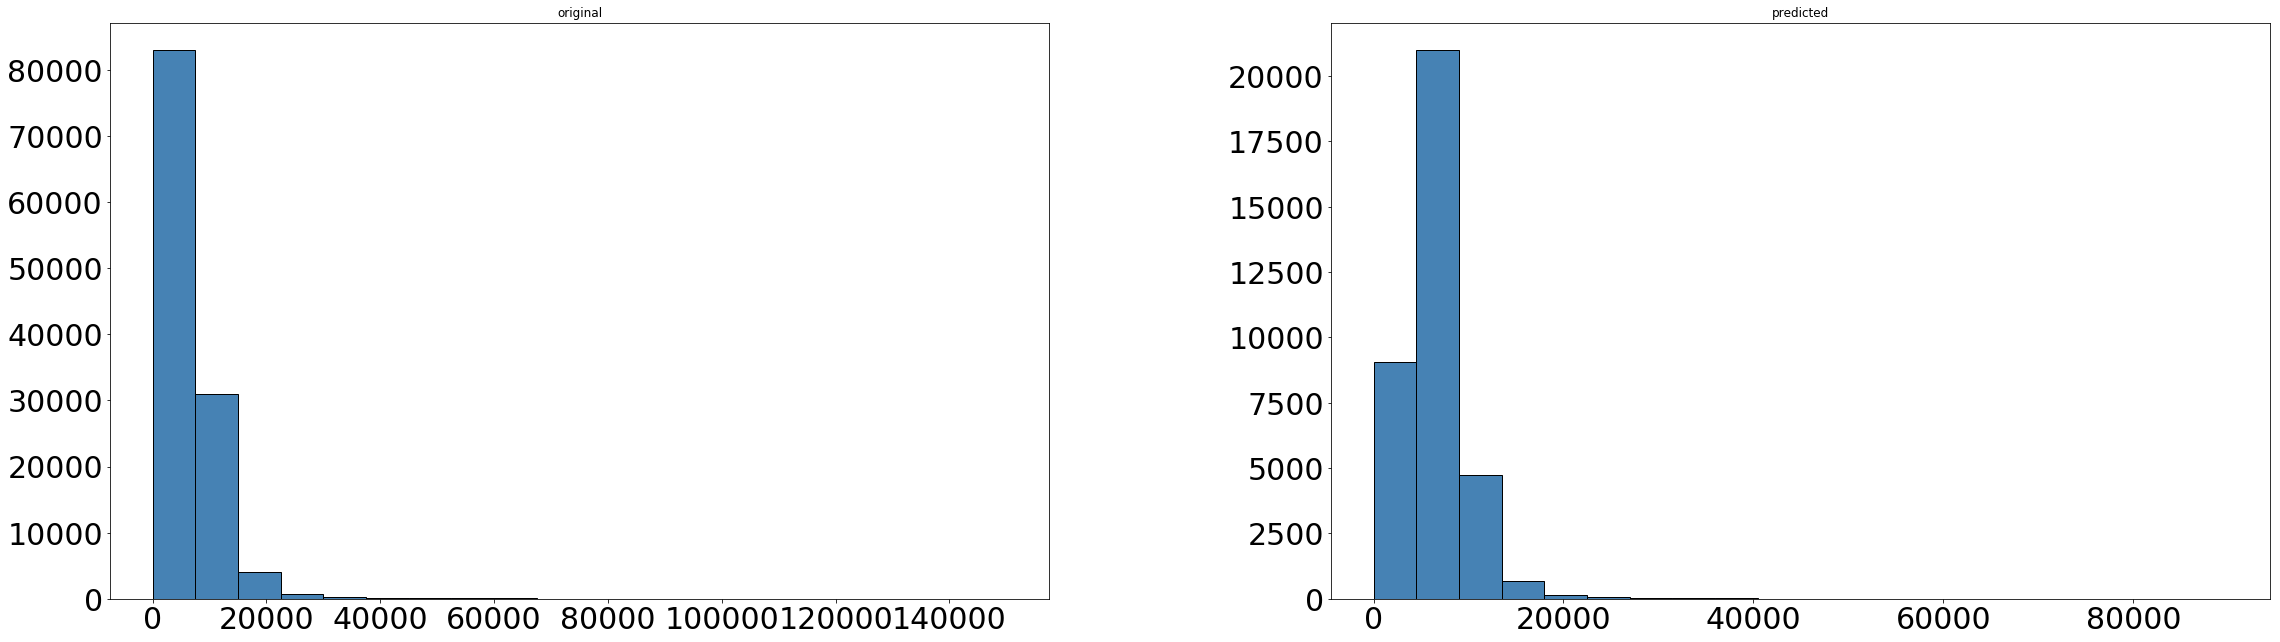

In [91]:
#Let's plot the distribution of the predicted monthly_income vs the one with values
#Create subplots
axes_1 = plt.subplot(1,2,1)
axes_2 = plt.subplot(1,2,2)

#Plot histogram
ax = credit_data[[column_to_plot]].hist(ax=axes_1, bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0, grid=False);

plt.hist(y_pred,bins=20, color='steelblue', 
           edgecolor='black', linewidth=1.0);

#Adjust subplot size
plt.subplots_adjust(left  = 0, right = 5, bottom = 0.0, top = 2)

#Set axis label sizes
axes_1.tick_params(labelsize=30)
axes_2.tick_params(labelsize=30)

axes_1.set_title(column_to_plot,fontsize= 30)
axes_2.set_title(column_to_plot,fontsize= 30)

axes_1.set_title("original")
axes_2.set_title("predicted")

plt.show()

In [92]:
print("predicted values mean: {0} - std: {1}".format(np.mean(y_pred), np.std(y_pred)))
print("original values mean: {0} - std: {1}".format(credit_data_no_nan.monthly_income.mean(), credit_data_no_nan.monthly_income.std()))

predicted values mean: 6498.07092566241 - std: 3735.706360722076
original values mean: 6503.406437991186 - std: 5698.651455390851


Means of both distributions are similar but predicted values are less disperse. We will procede to impute monthly_income values using this predictions.

In [93]:
X=X_predict.copy()
X['monthly_income'] = reg.predict(X_predict).astype(np.int64)

In [94]:
credit_data_no_nan.update(X, overwrite=False)

In [95]:
credit_data_no_nan['monthly_income'] = credit_data_no_nan['monthly_income'].astype('int64')

In [96]:
credit_data_no_nan.head(10)

,borrower_id,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1.0,1.0,0.766127,45.0,2.0,0.802982,9120,13.0,0.0,6.0,0.0,2.0
1,2.0,0.0,0.957151,40.0,0.0,0.121876,2600,4.0,0.0,0.0,0.0,1.0
2,3.0,0.0,0.658180,38.0,1.0,0.085113,3042,2.0,1.0,0.0,0.0,0.0
3,4.0,0.0,0.233810,30.0,0.0,0.036050,3300,5.0,0.0,0.0,0.0,0.0
4,5.0,0.0,0.907239,49.0,1.0,0.024926,63588,7.0,0.0,1.0,0.0,0.0
5,6.0,0.0,0.213179,74.0,0.0,0.375607,3500,3.0,0.0,1.0,0.0,1.0
6,7.0,0.0,0.305682,57.0,0.0,4937.130000,0,8.0,0.0,3.0,0.0,0.0
7,8.0,0.0,0.754464,39.0,0.0,0.209940,3500,8.0,0.0,0.0,0.0,0.0
8,9.0,0.0,0.116951,27.0,0.0,46.000000,0,2.0,0.0,0.0,0.0,0.0
9,10.0,0.0,0.189169,57.0,0.0,0.606291,23684,9.0,0.0,4.0,0.0,2.0


In [97]:
#Shape of the cleanead dataset
credit_data_no_nan.shape

(148807, 12)

We tried to minimize the loss of information

In [98]:
#Store in a new csv for further data analysis
credit_data_no_nan.to_csv('../data_out/clean_credit_data.csv')